In [21]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **MIMIC**

## **Loading data and creating Signals objects**

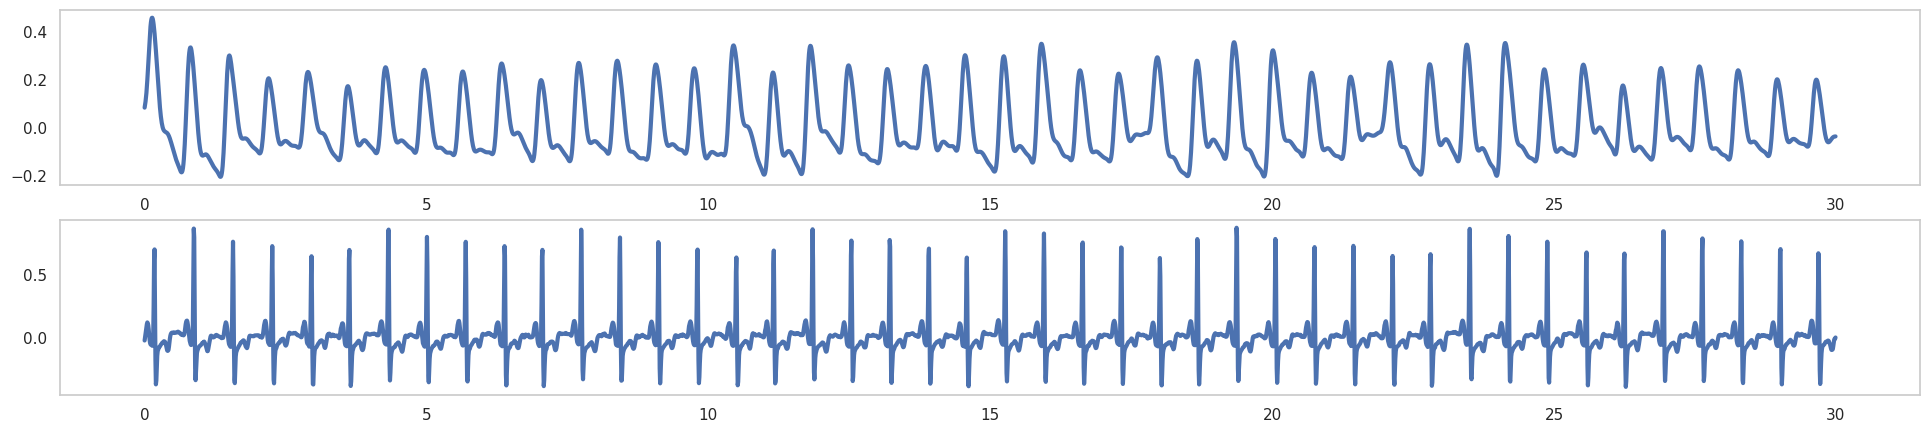

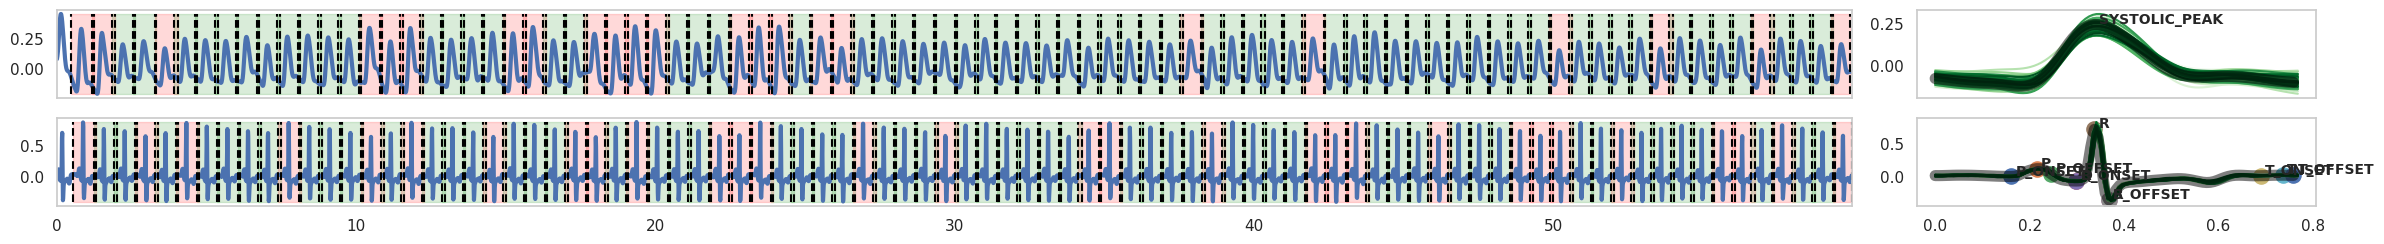

In [22]:
from msr.data.download.mimic import load_mimic_raw_tensors_for_split, FS
from msr.data.measurements import MimicMeasurement

data, targets = load_mimic_raw_tensors_for_split("val", "sbp_dbp_avg")
data, targets = data.numpy(), targets.numpy()
sample = data[222]
ppg, ecg = sample.T
measurement = MimicMeasurement(ppg, ecg, FS)
measurement.set_beats(source_channel='ecg', align_to_peak=True)
measurement.set_agg_beat()
ecg_sig = measurement['ecg']

fig, axes = plt.subplots(2, 1, figsize=(24, 5))
measurement.plot(0, 30, axes=axes)
measurement.plot_beats_segmentation(invalid=False)

{'basic__entropy': 3.6396889372757397,
 'basic__zero_num_crosses': 176,
 'basic__zero_pos_cross_std': 1.3119570642188758,
 'basic__zero_neg_cross_std': 1.2398884193252229,
 'basic__mean_num_crosses': 712,
 'basic__mean_pos_cross_std': 15.388372736359113,
 'basic__mean_neg_cross_std': 21.29880856248333,
 'basic__percentile_5': 0.1649606299212602,
 'basic__percentile_25': 0.23622047244094488,
 'basic__percentile_75': 0.31496062992125984,
 'basic__percentile_95': 0.4251968503937008,
 'basic__median': 0.2755905511811024,
 'basic__mean': 0.2918509186351706,
 'basic__std': 0.16610085818977965,
 'basic__var': 0.027589495091381293,
 'basic__root_mean_square': 0.2968062992125985,
 'basic__kurtosis': 18.38771556353594,
 'basic__skew': 3.2856043895034572,
 'basic__energy': 845.748403496812,
 'peaks_troughs__peaks__entropy': 4.462481251069089,
 'peaks_troughs__peaks__zero_num_crosses': 0,
 'peaks_troughs__peaks__zero_pos_cross_std': -1,
 'peaks_troughs__peaks__zero_neg_cross_std': -1,
 'peaks_trou

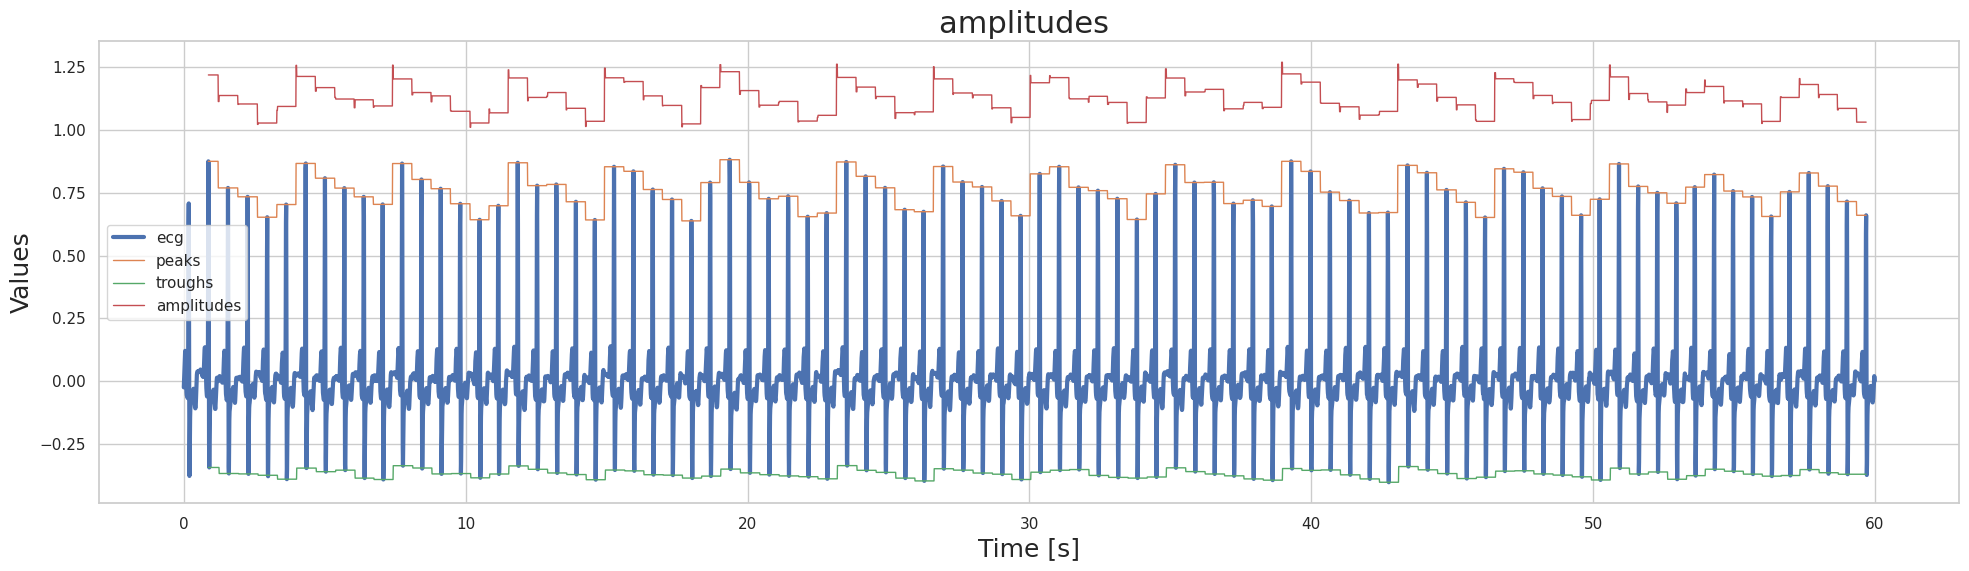

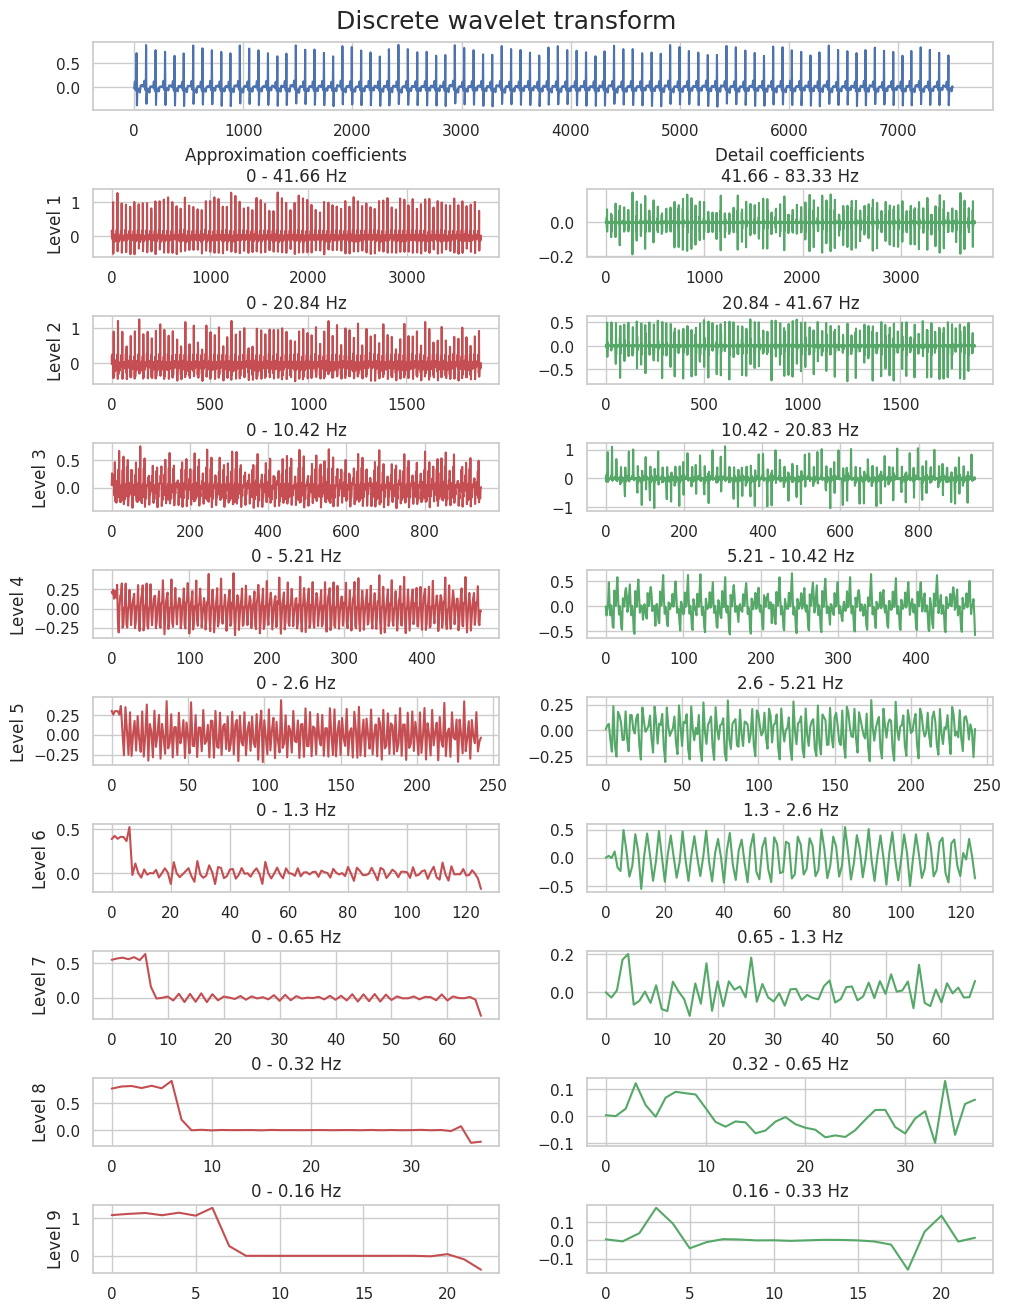

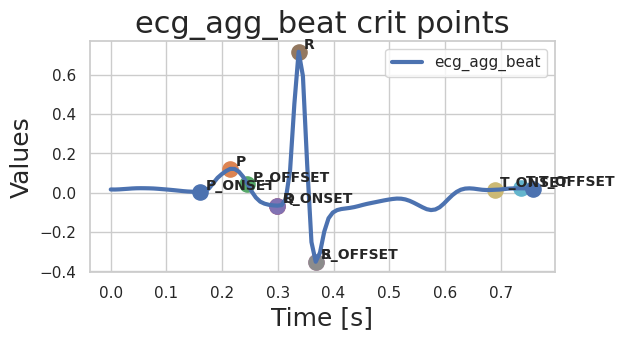

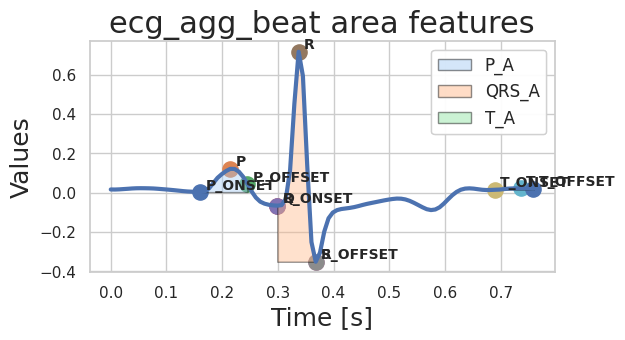

In [24]:
ecg_sig.extract_features(False, True)

# **PTB-XL**

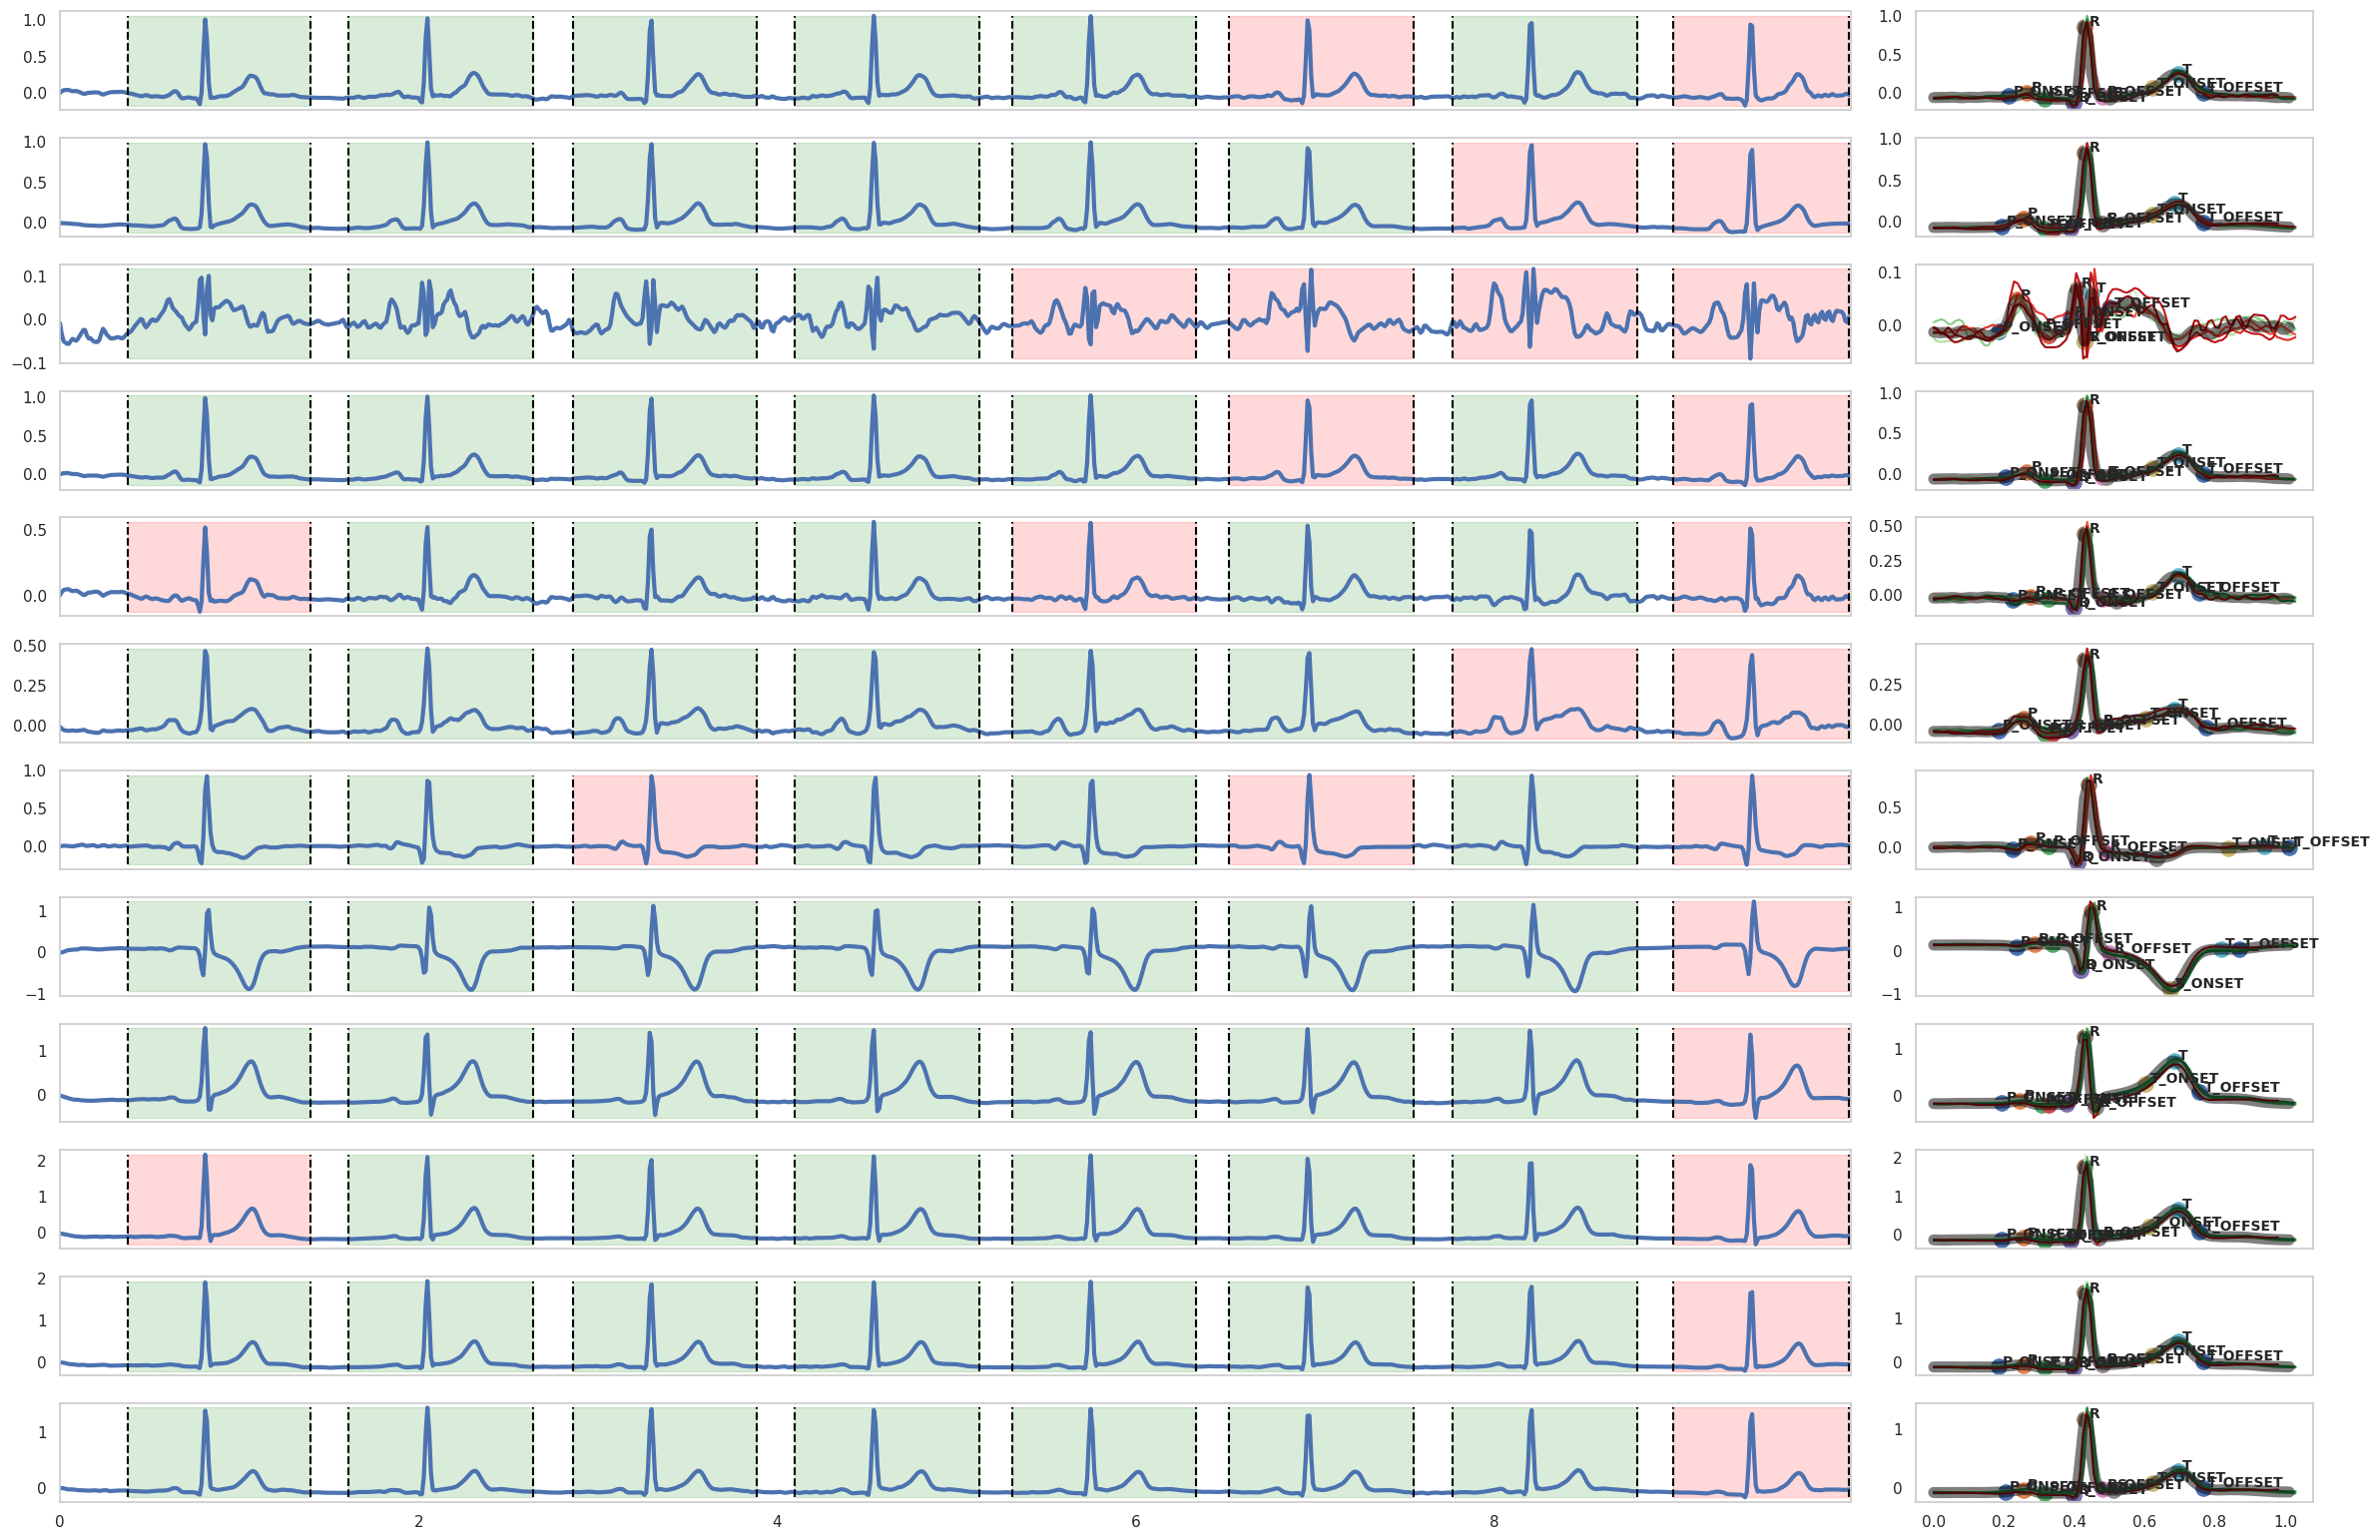

In [25]:
from msr.data.download.ptbxl import load_ptbxl_raw_tensors_for_split, FS
from msr.data.measurements import PtbXLMeasurement

data, targets = load_ptbxl_raw_tensors_for_split("val", "diagnostic_class")
data, targets = data.numpy(), targets.numpy()
sample = data[222]
measurement = PtbXLMeasurement(*sample.T, fs=FS)
measurement.set_beats(source_channel='ecg_2', align_to_peak=False)
measurement.set_agg_beat()
ecg_sig = measurement['ecg_1']
measurement.plot_beats_segmentation(invalid=False)

/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/numpy/core/_

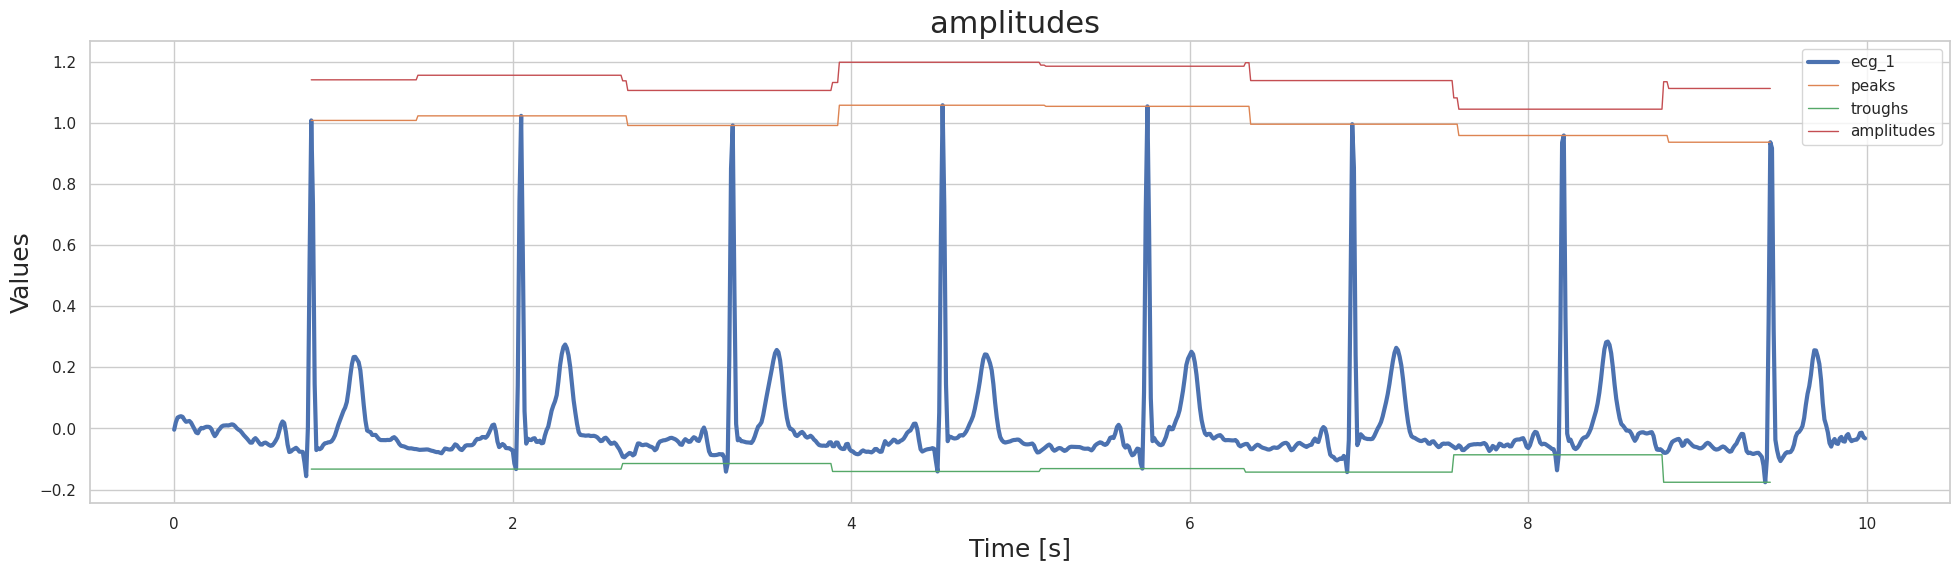

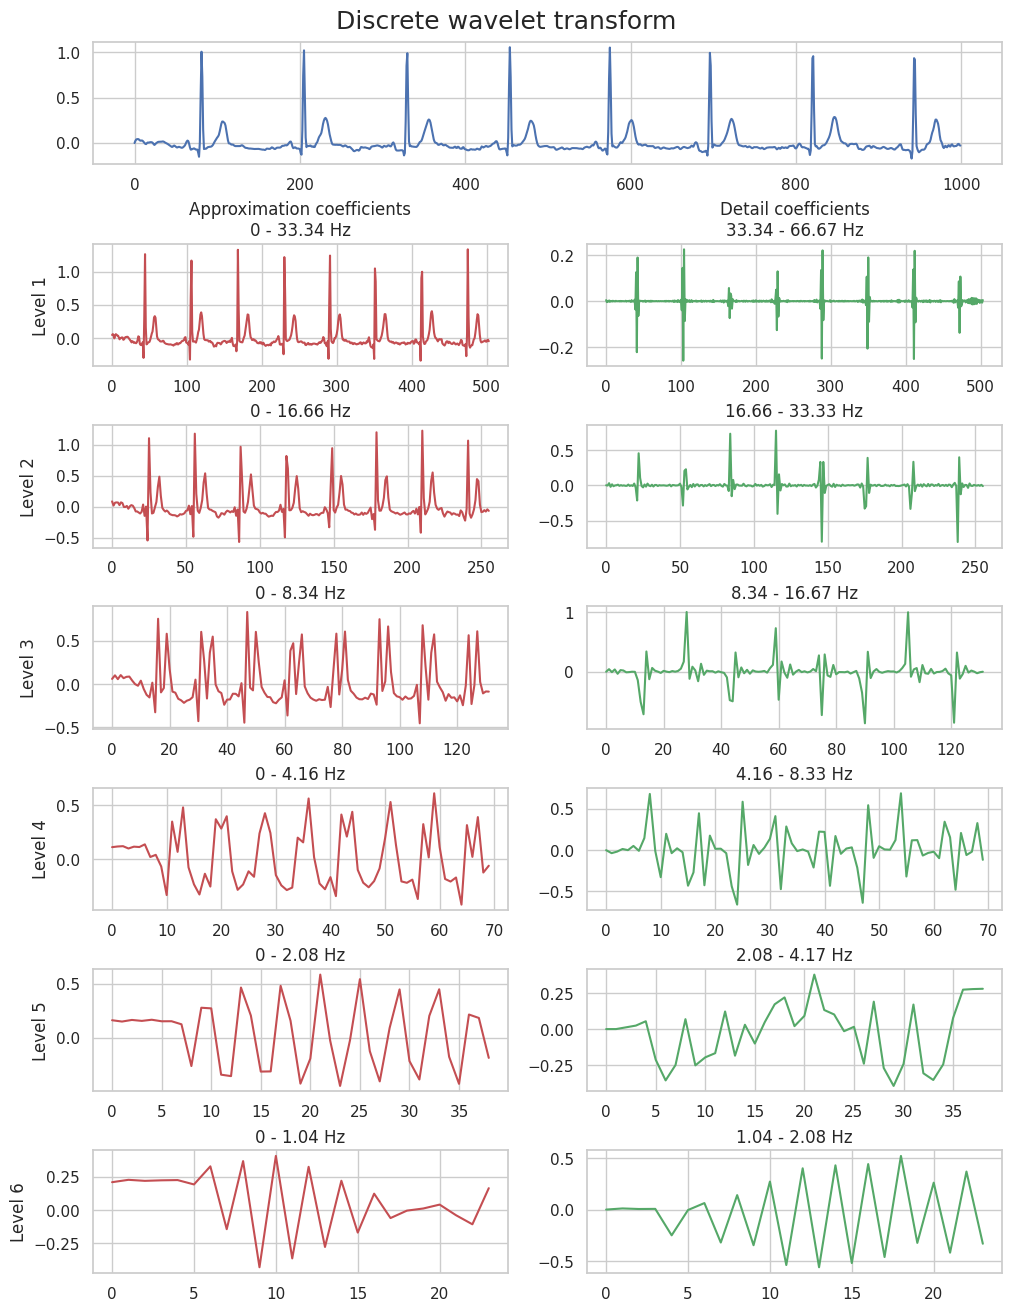

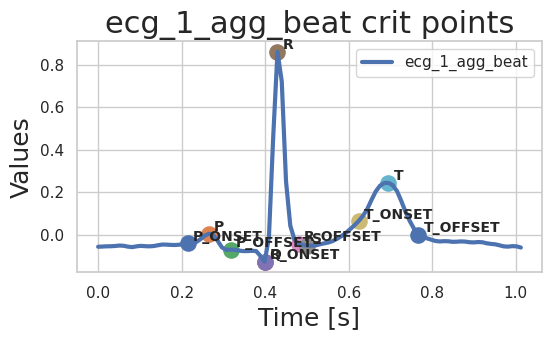

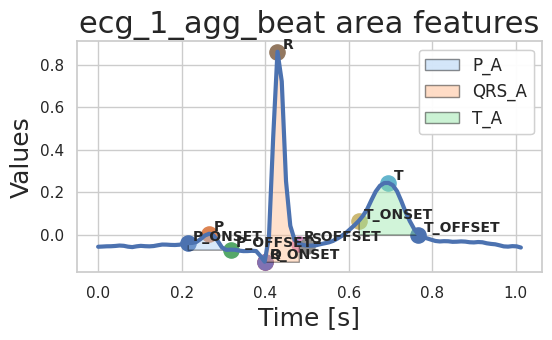

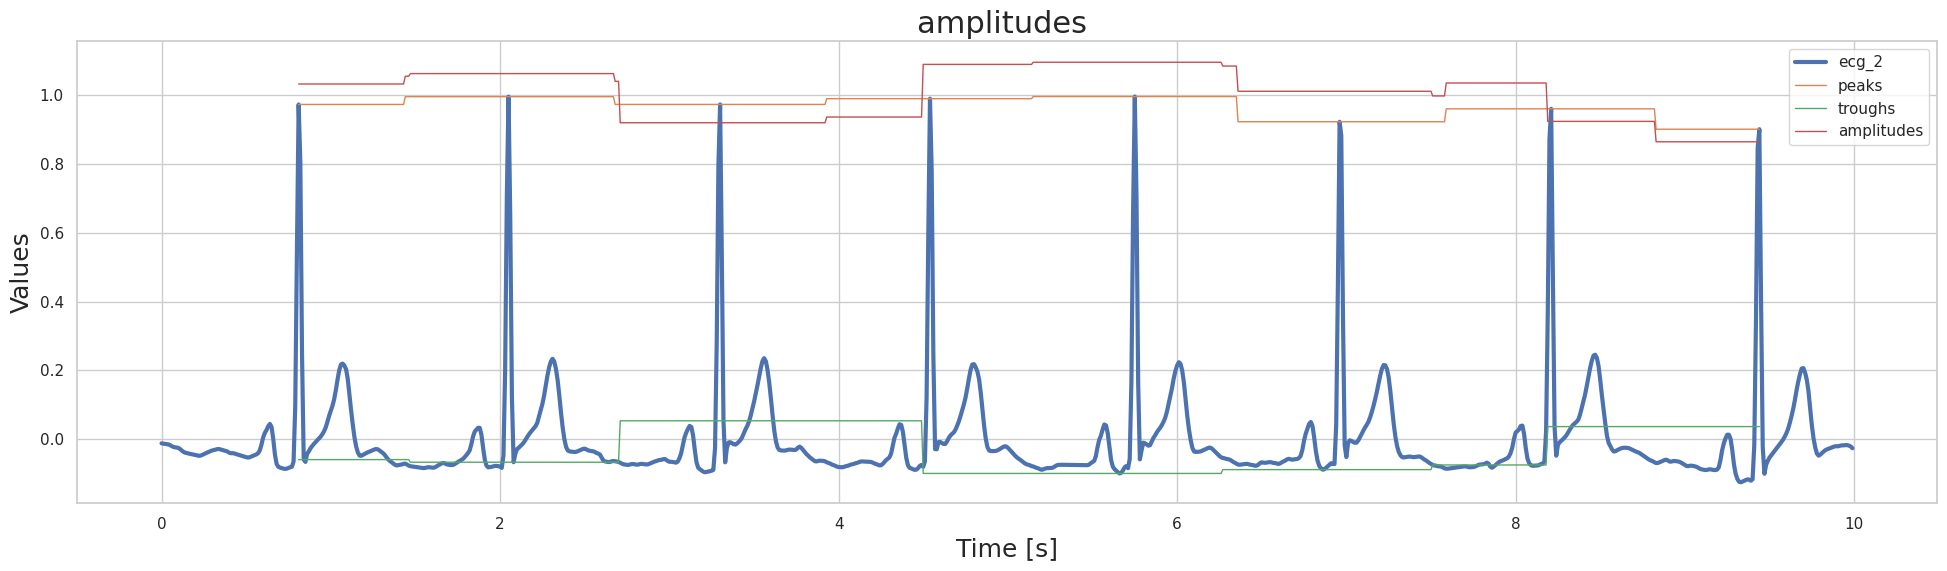

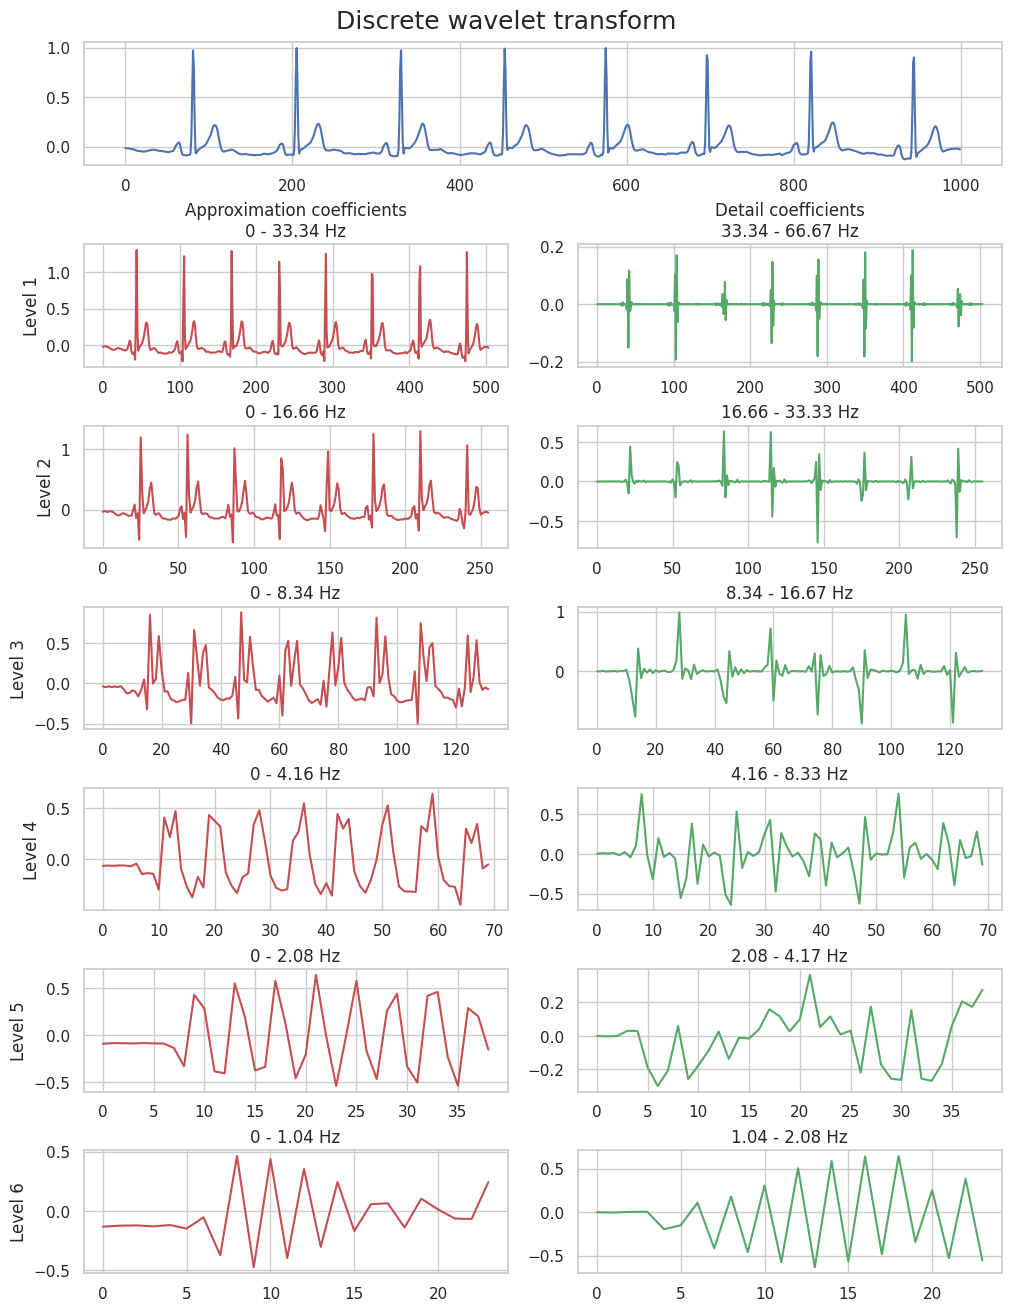

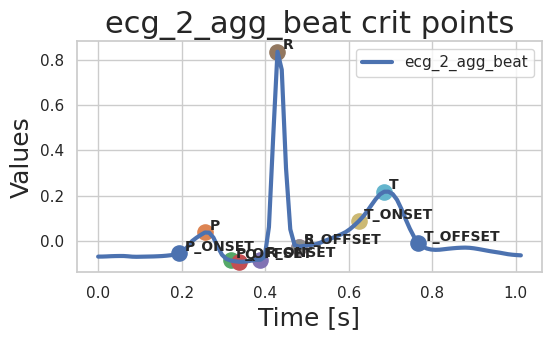

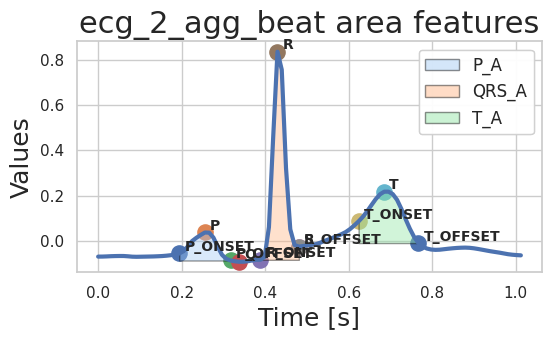

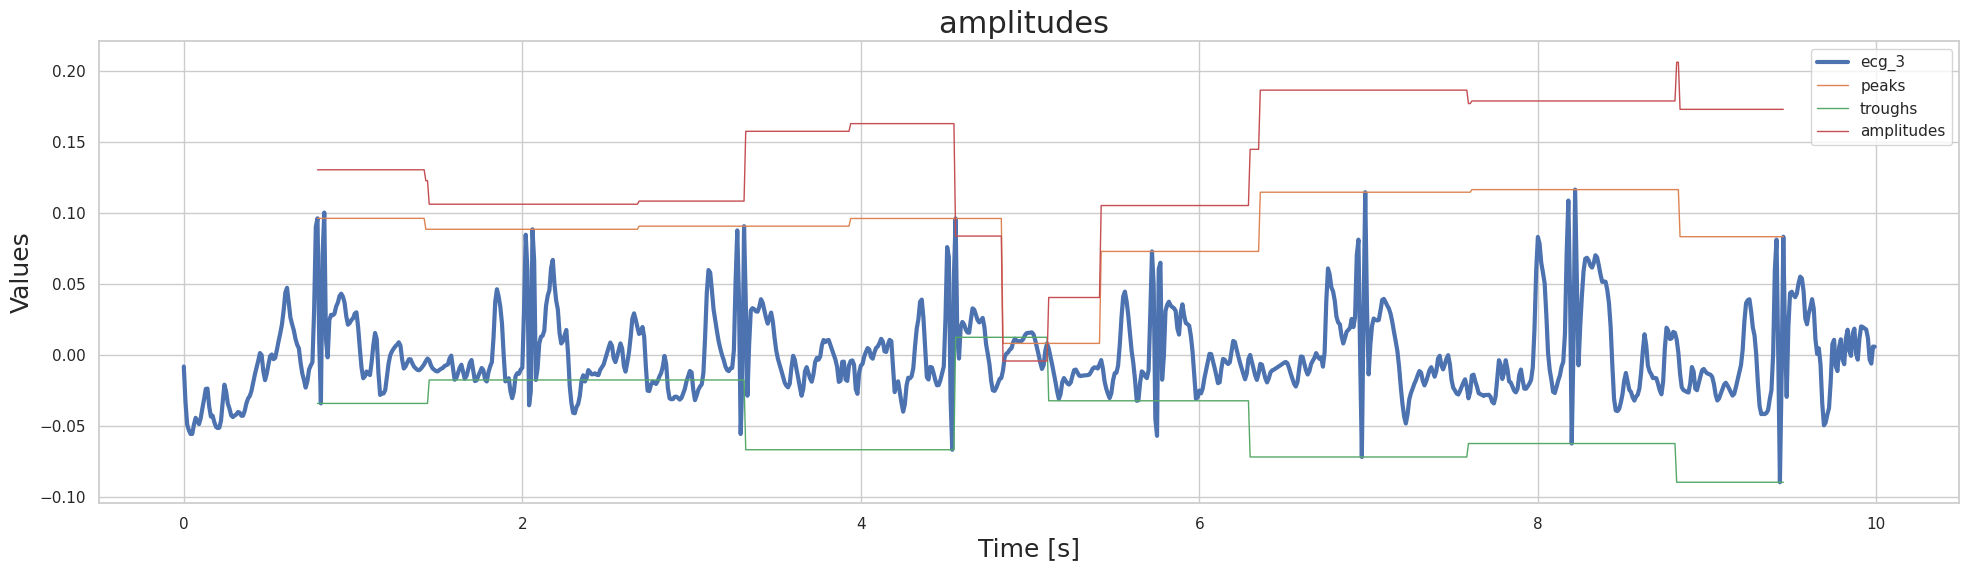

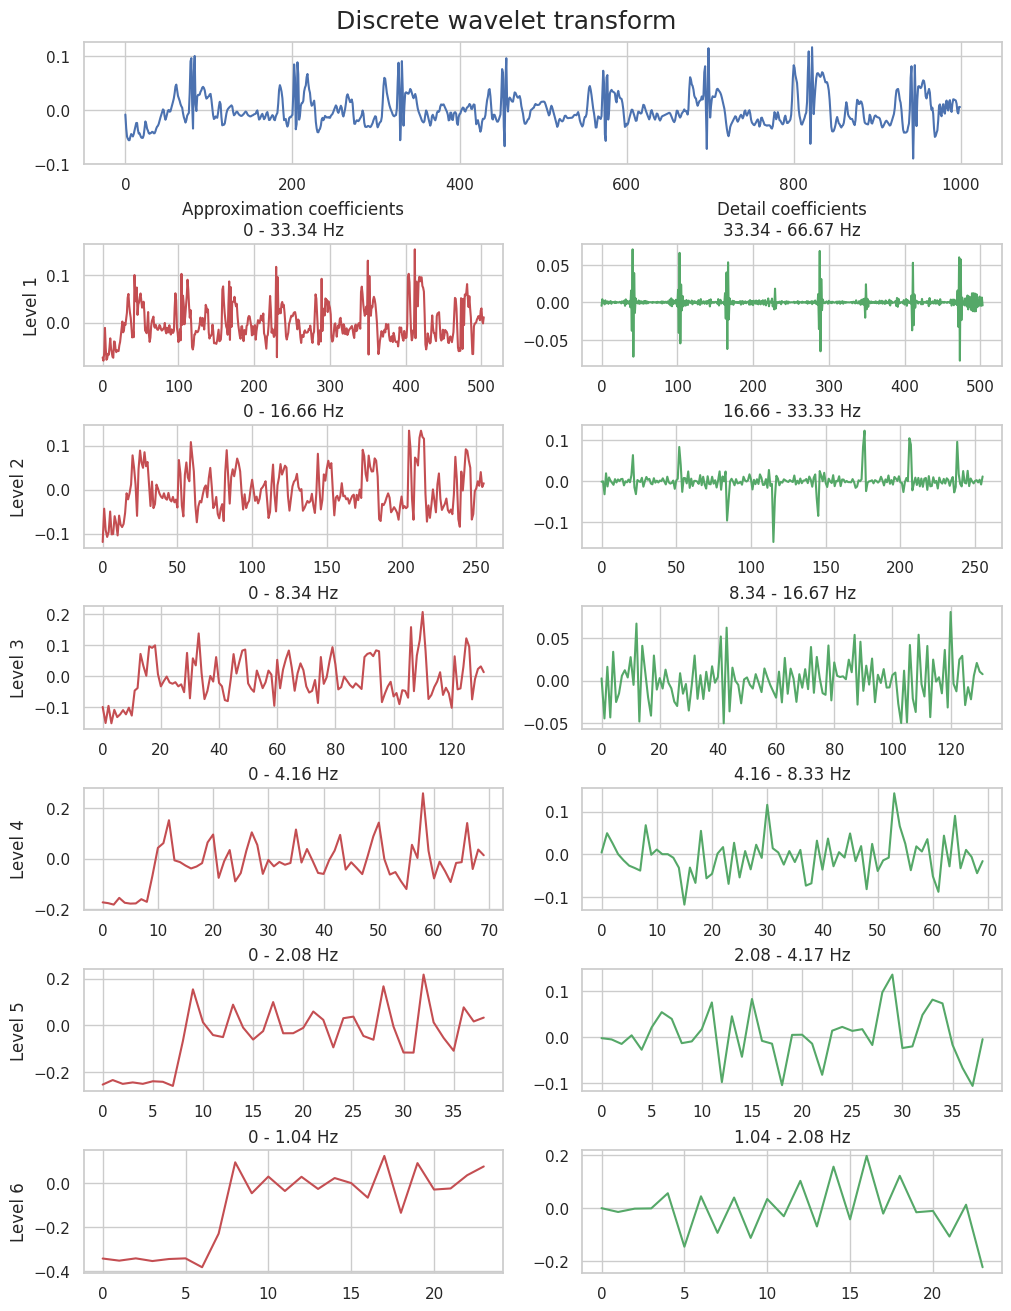

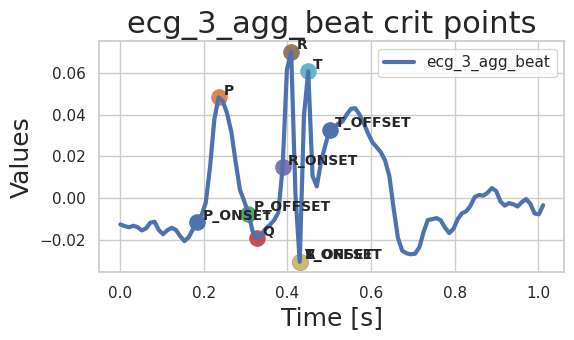

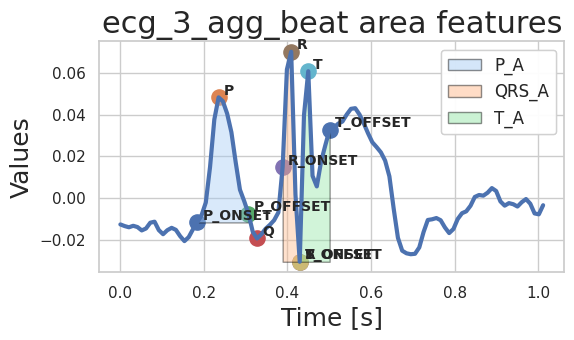

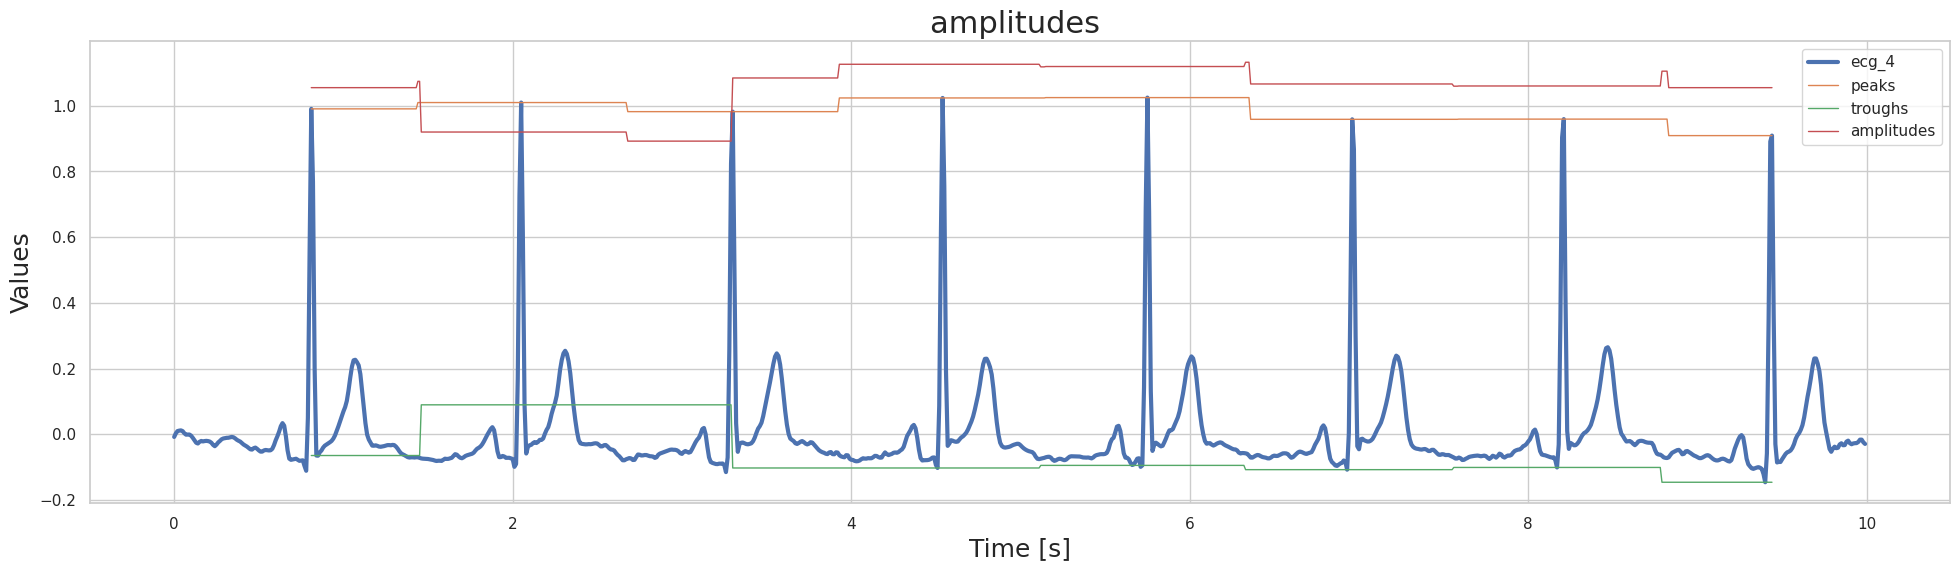

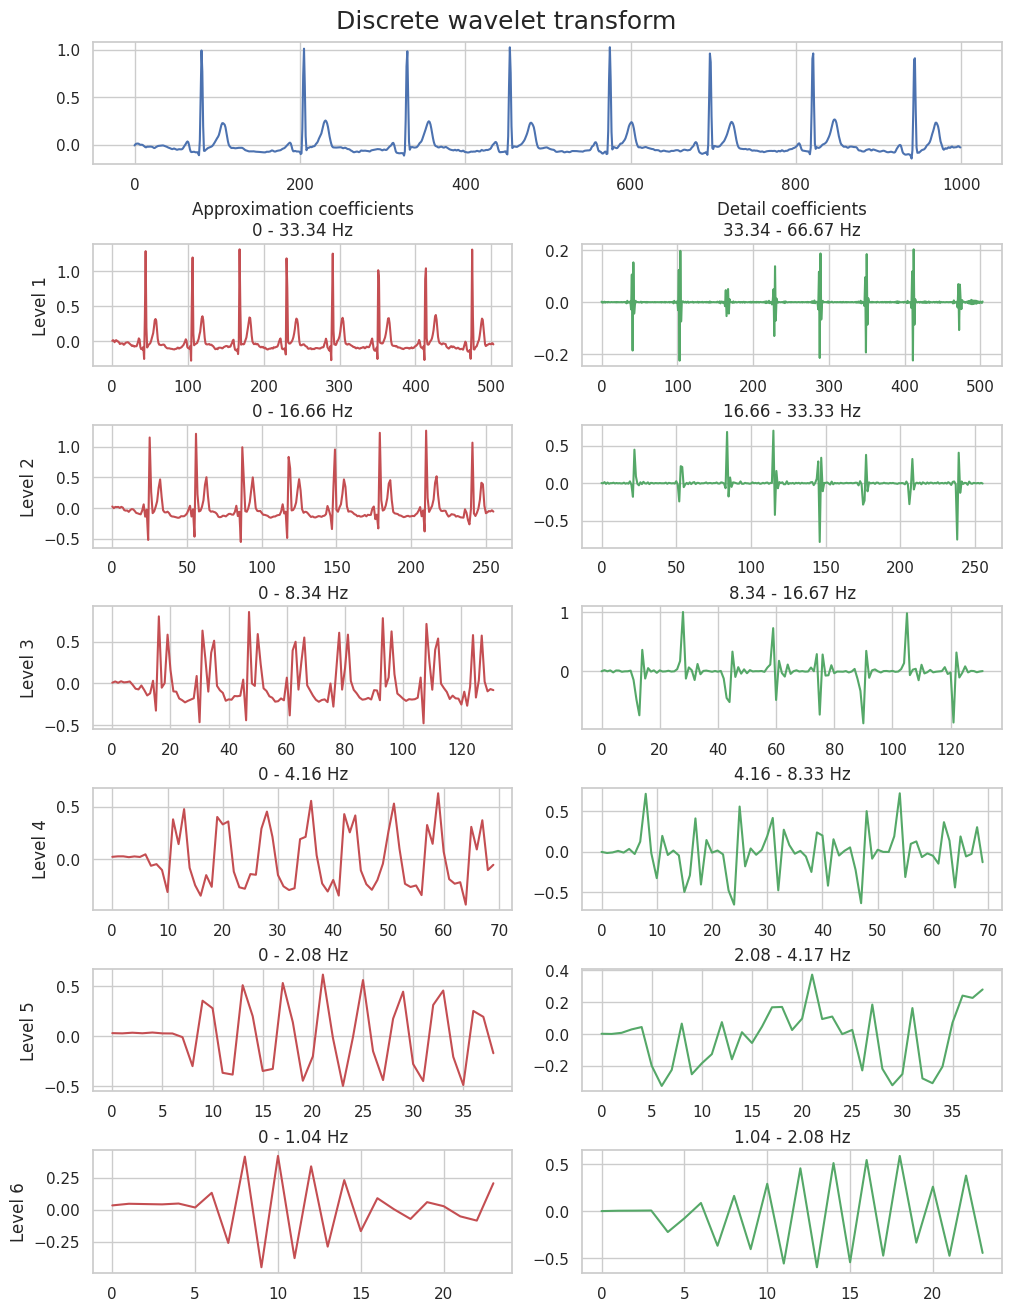

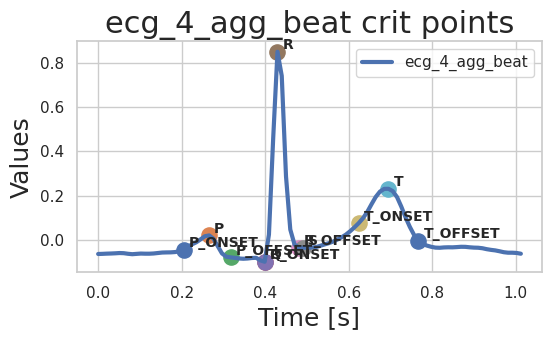

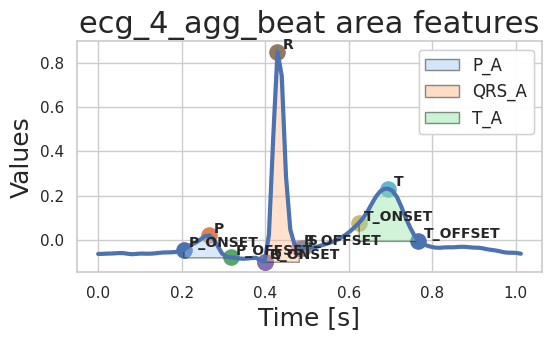

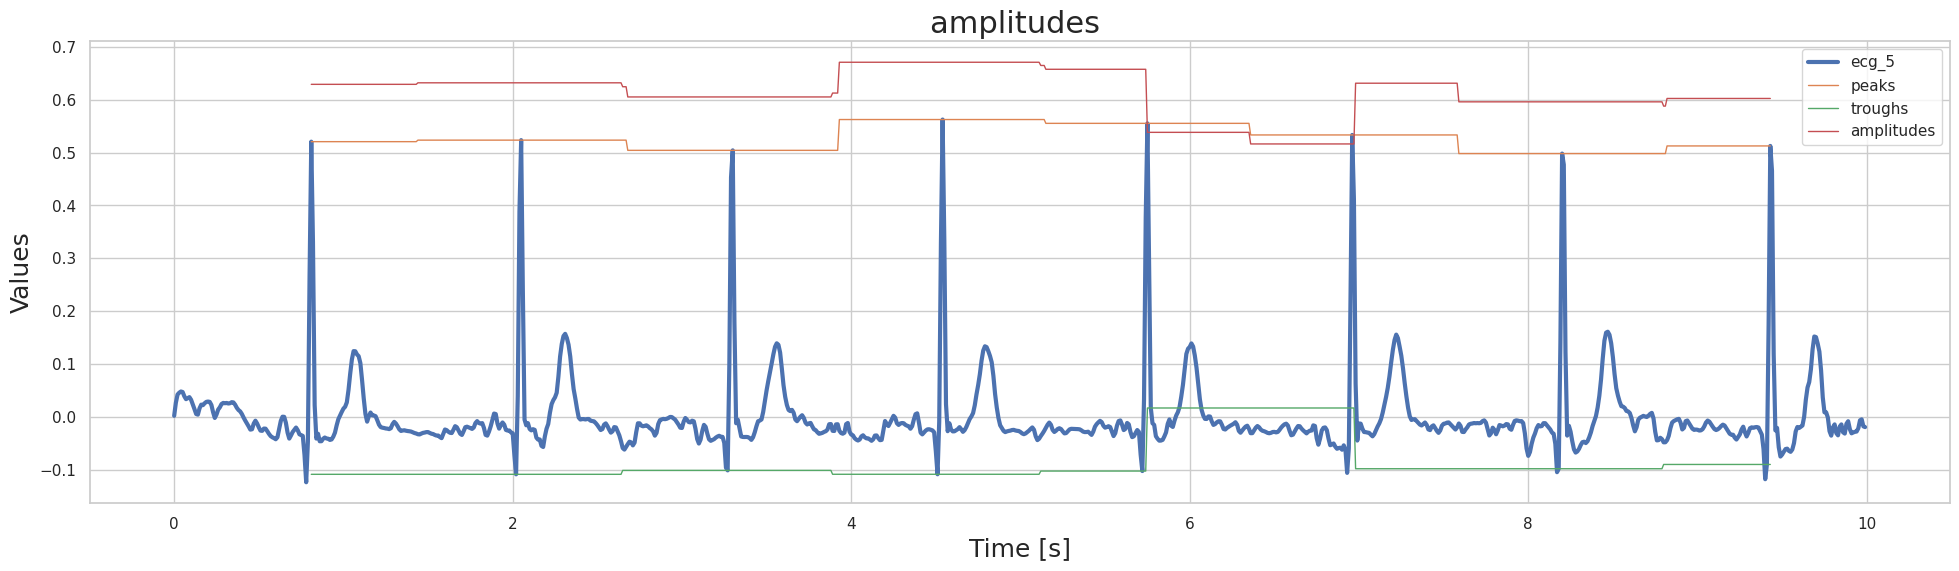

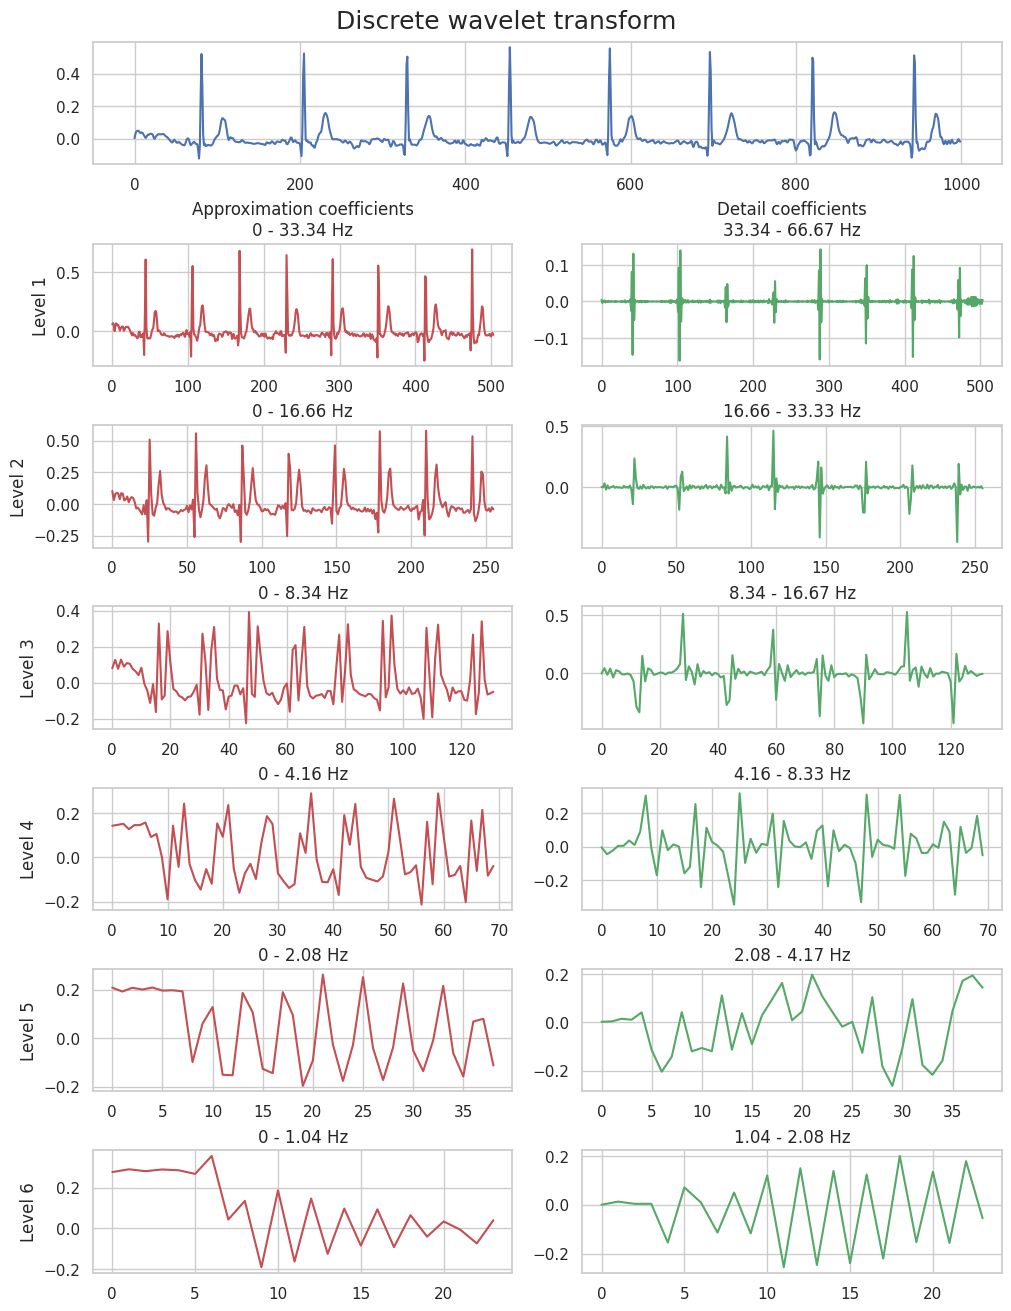

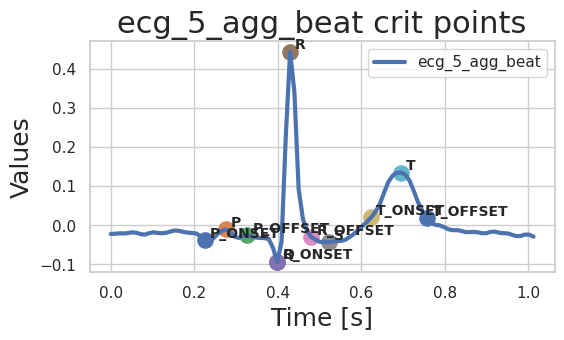

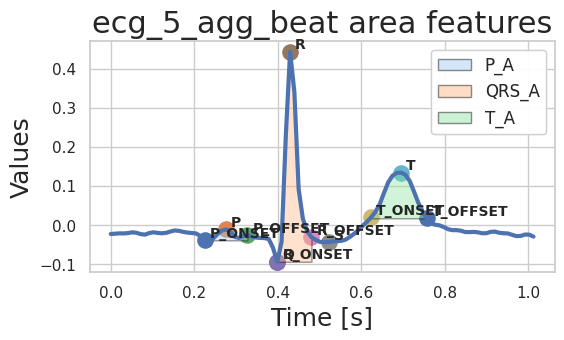

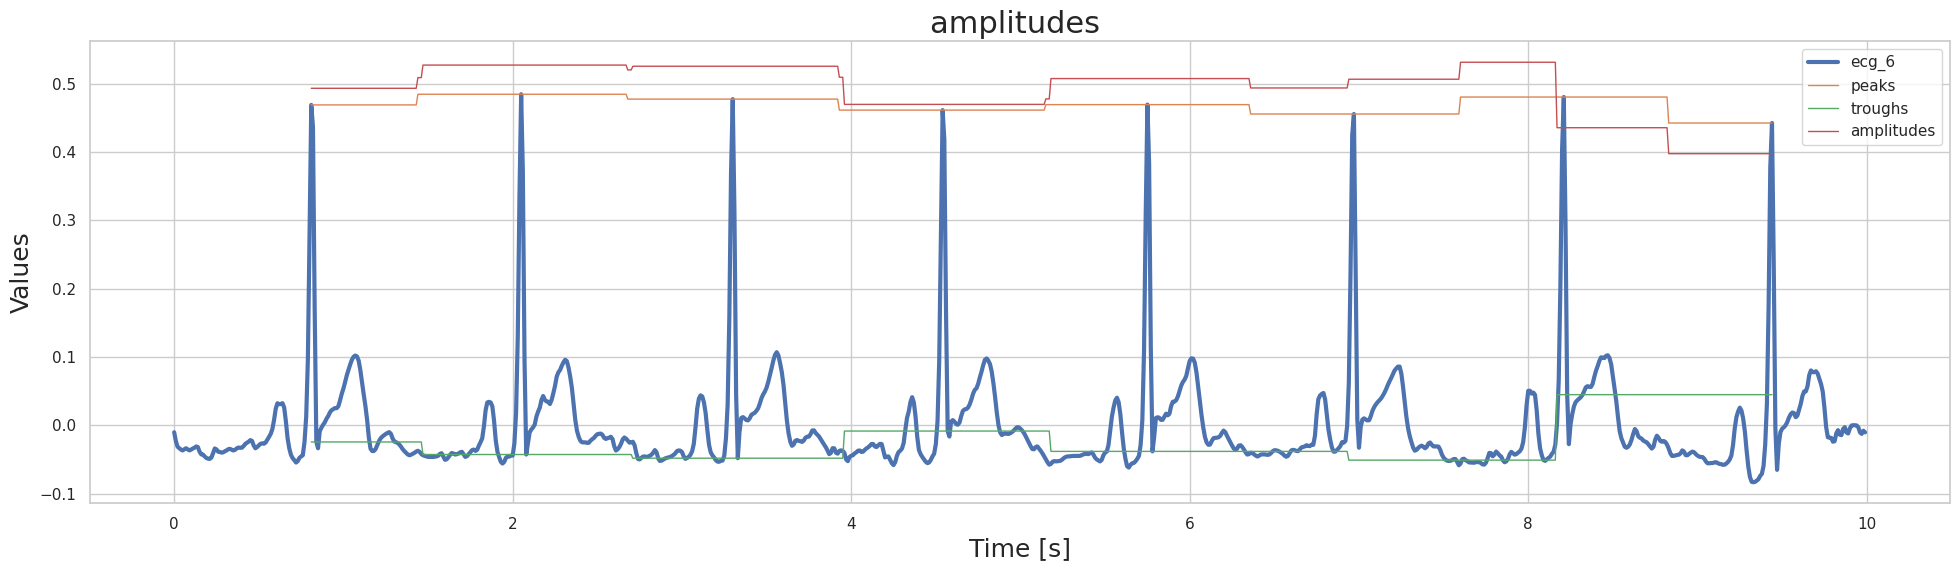

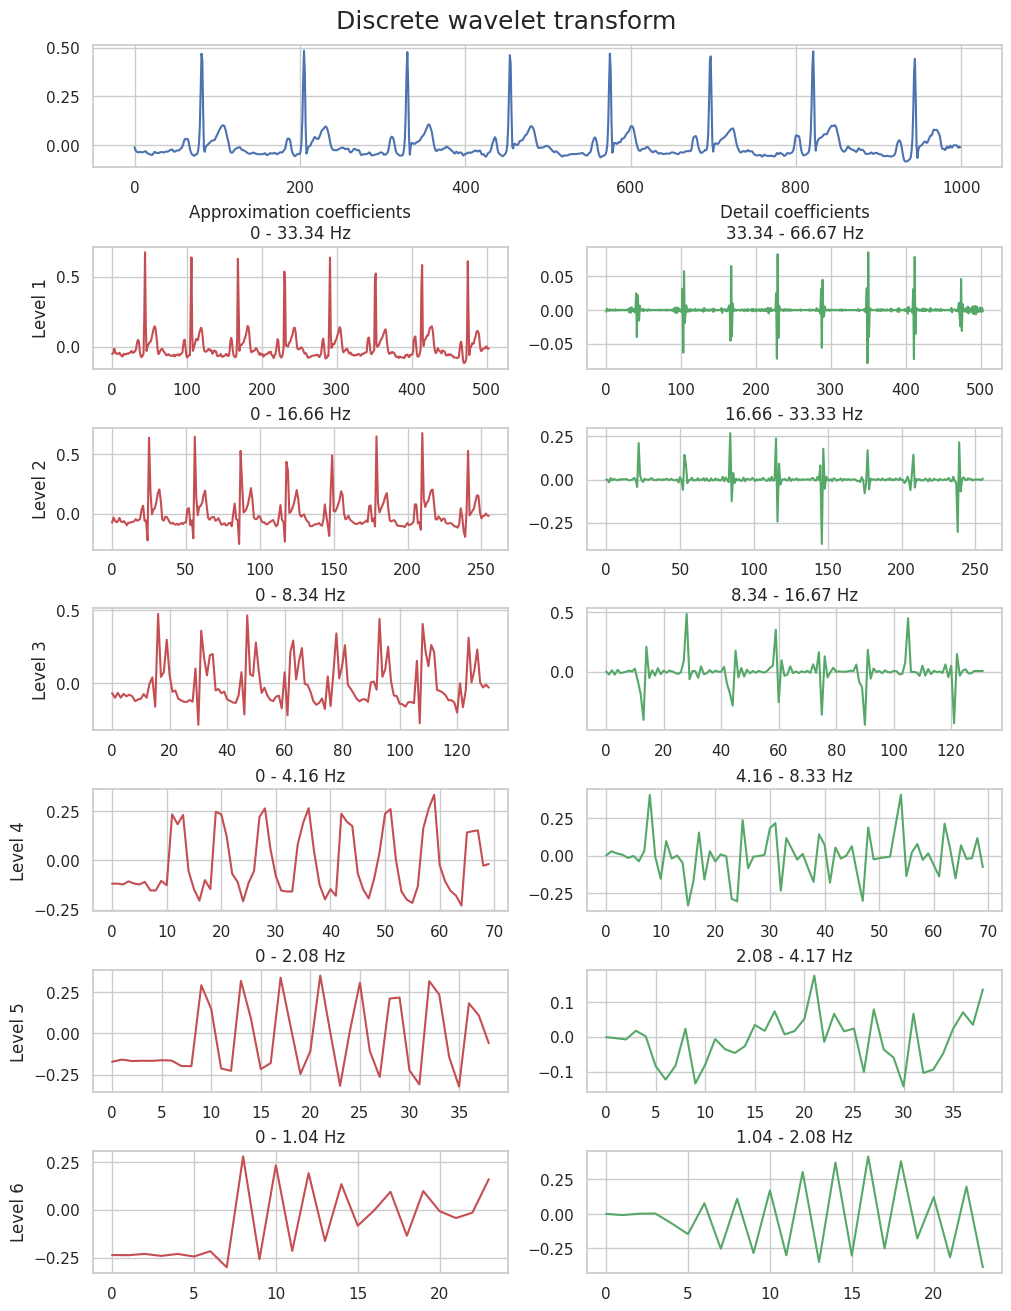

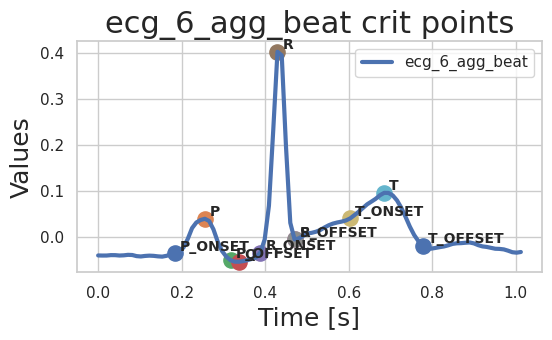

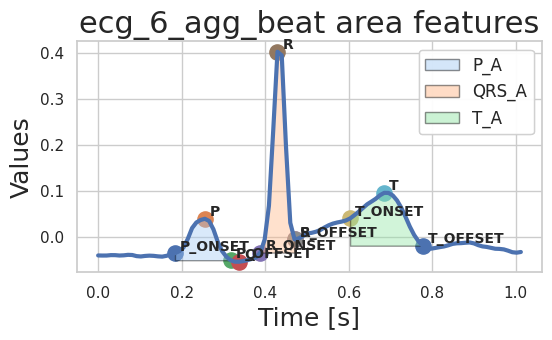

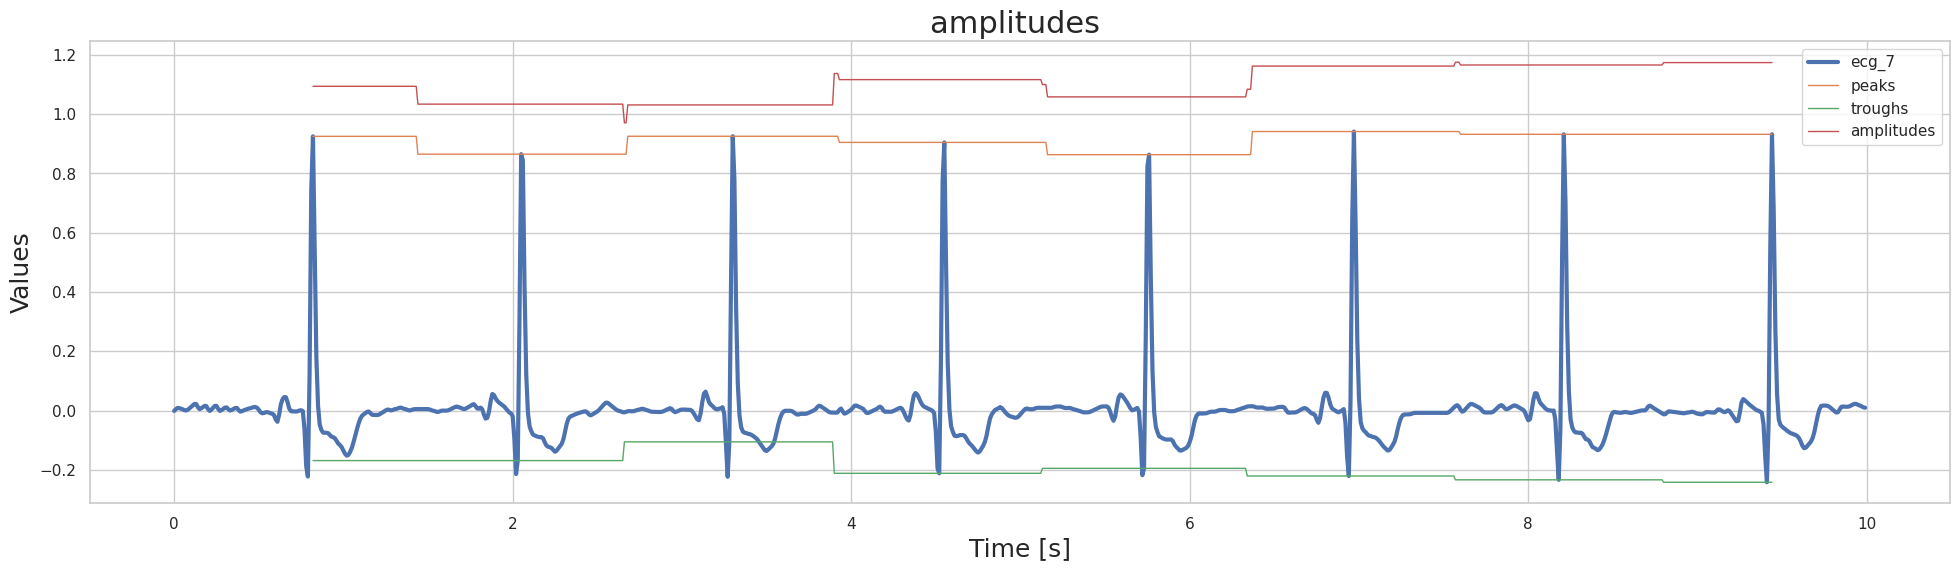

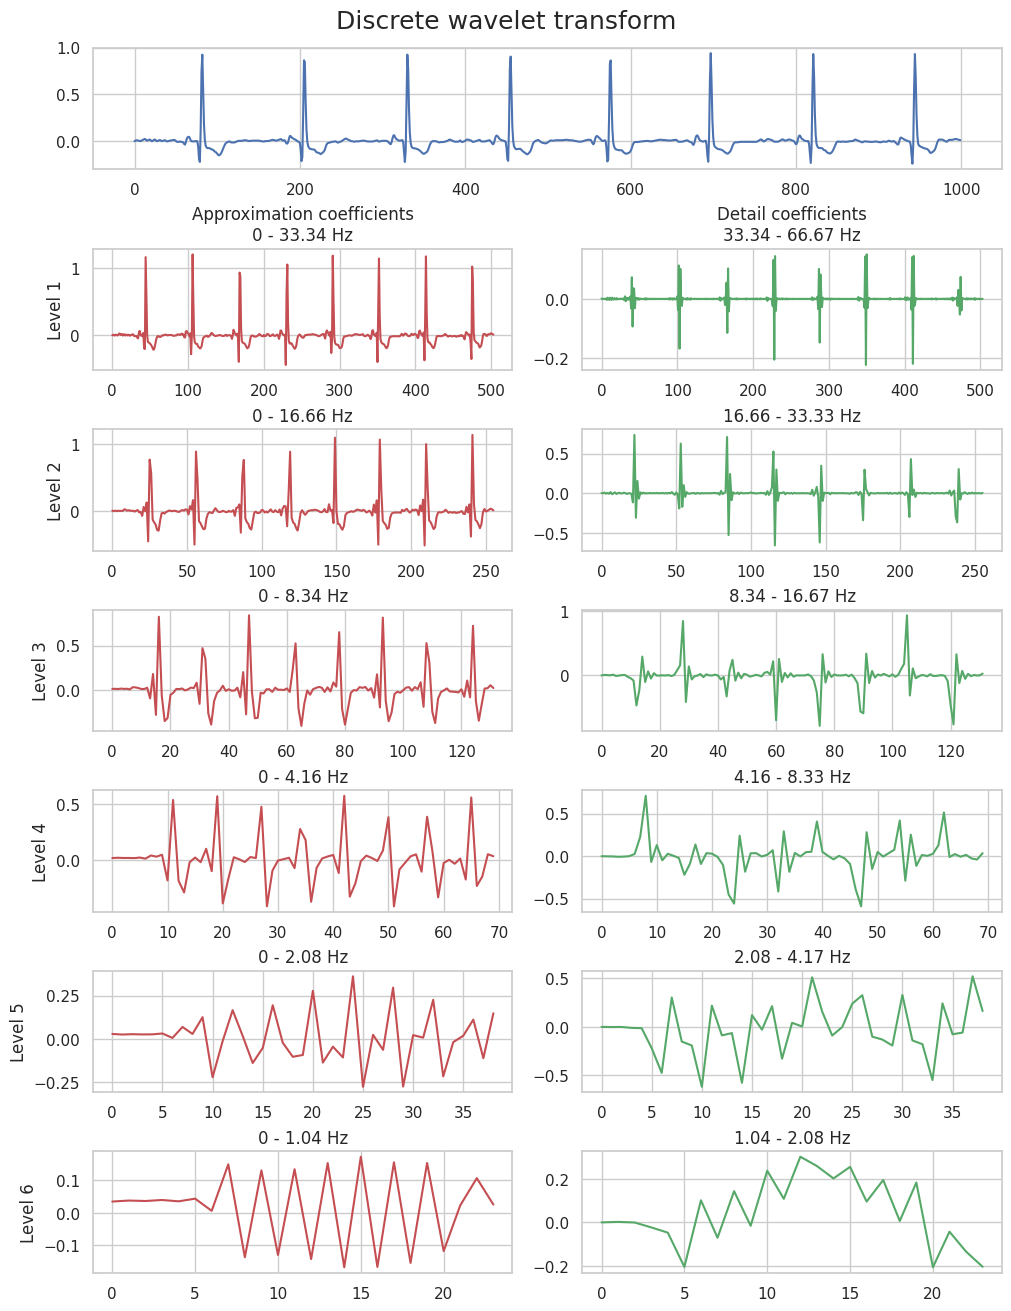

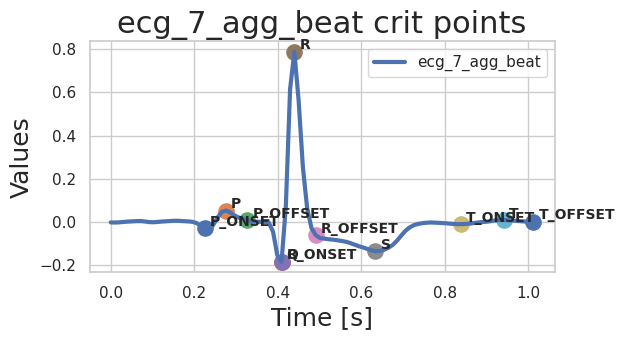

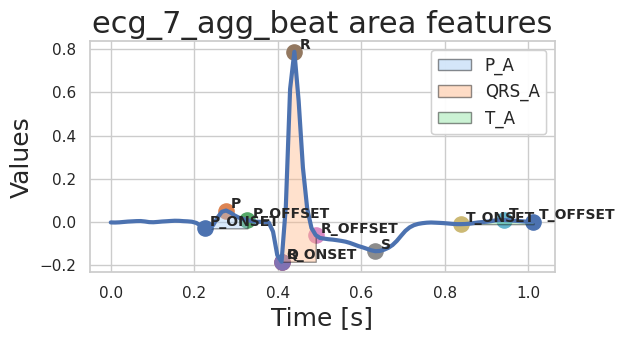

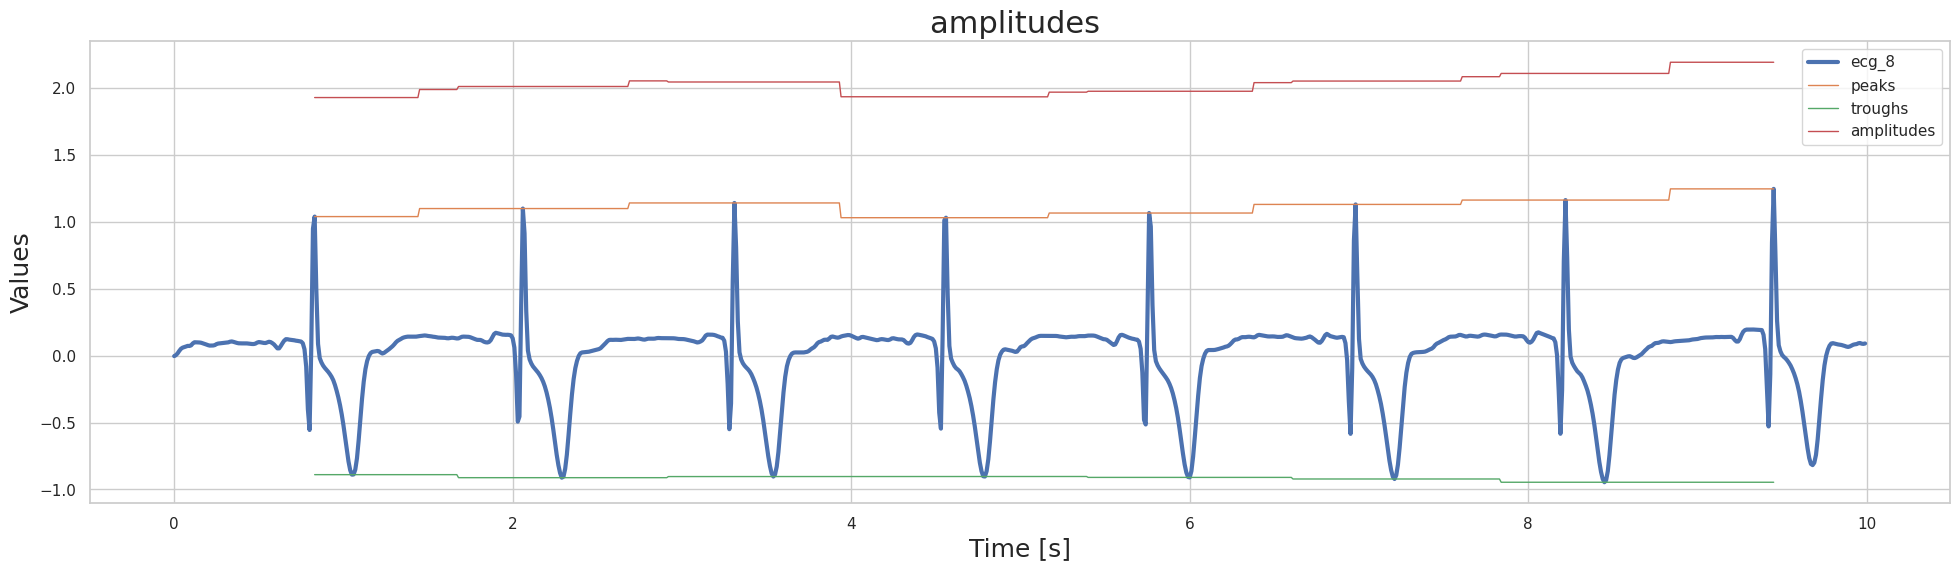

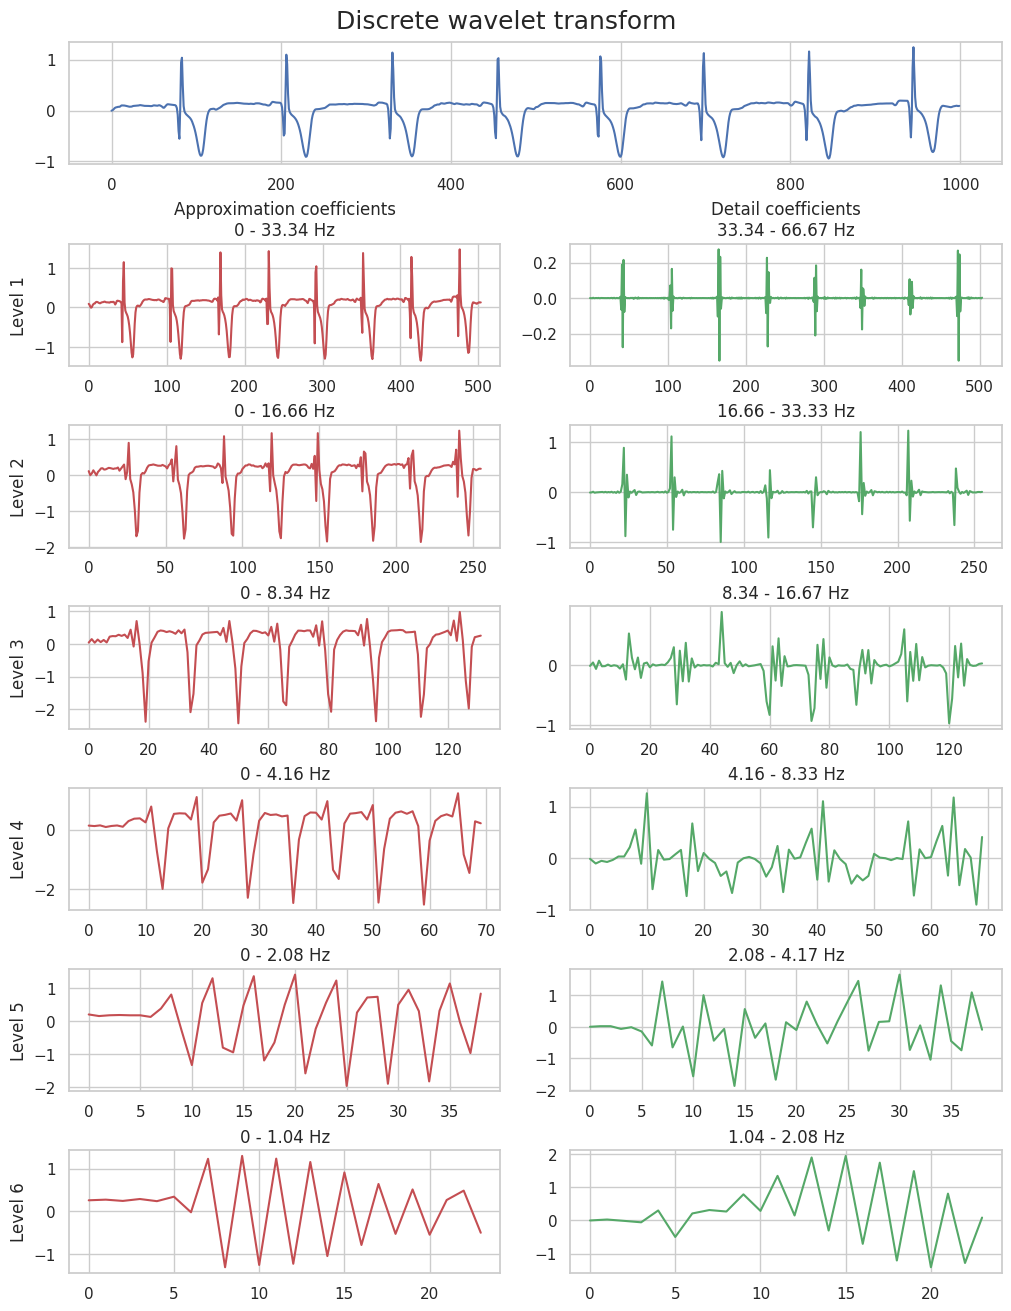

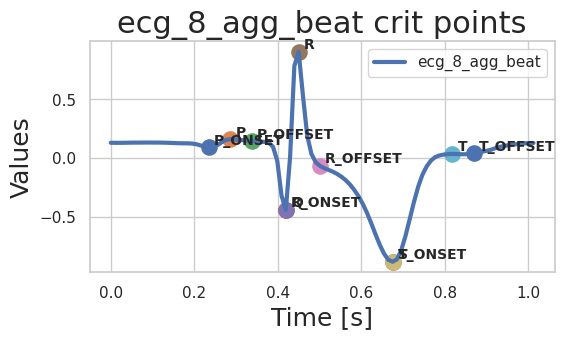

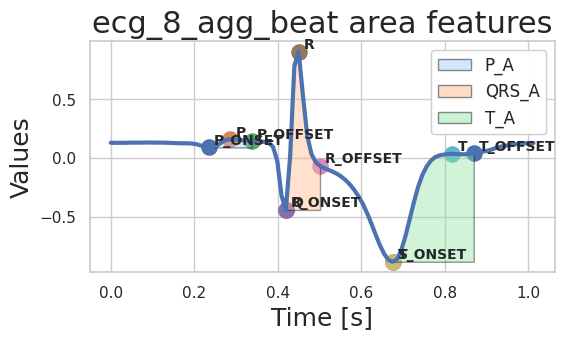

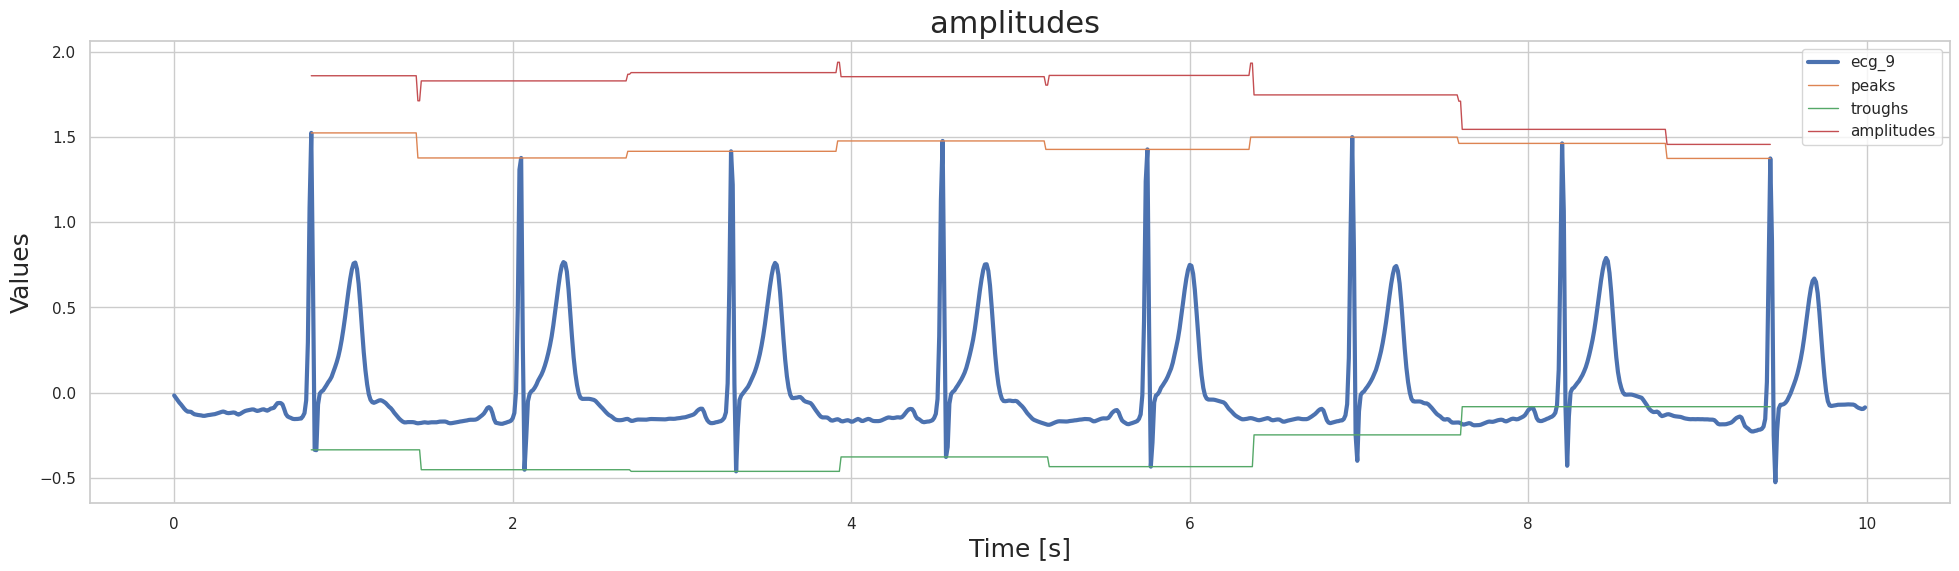

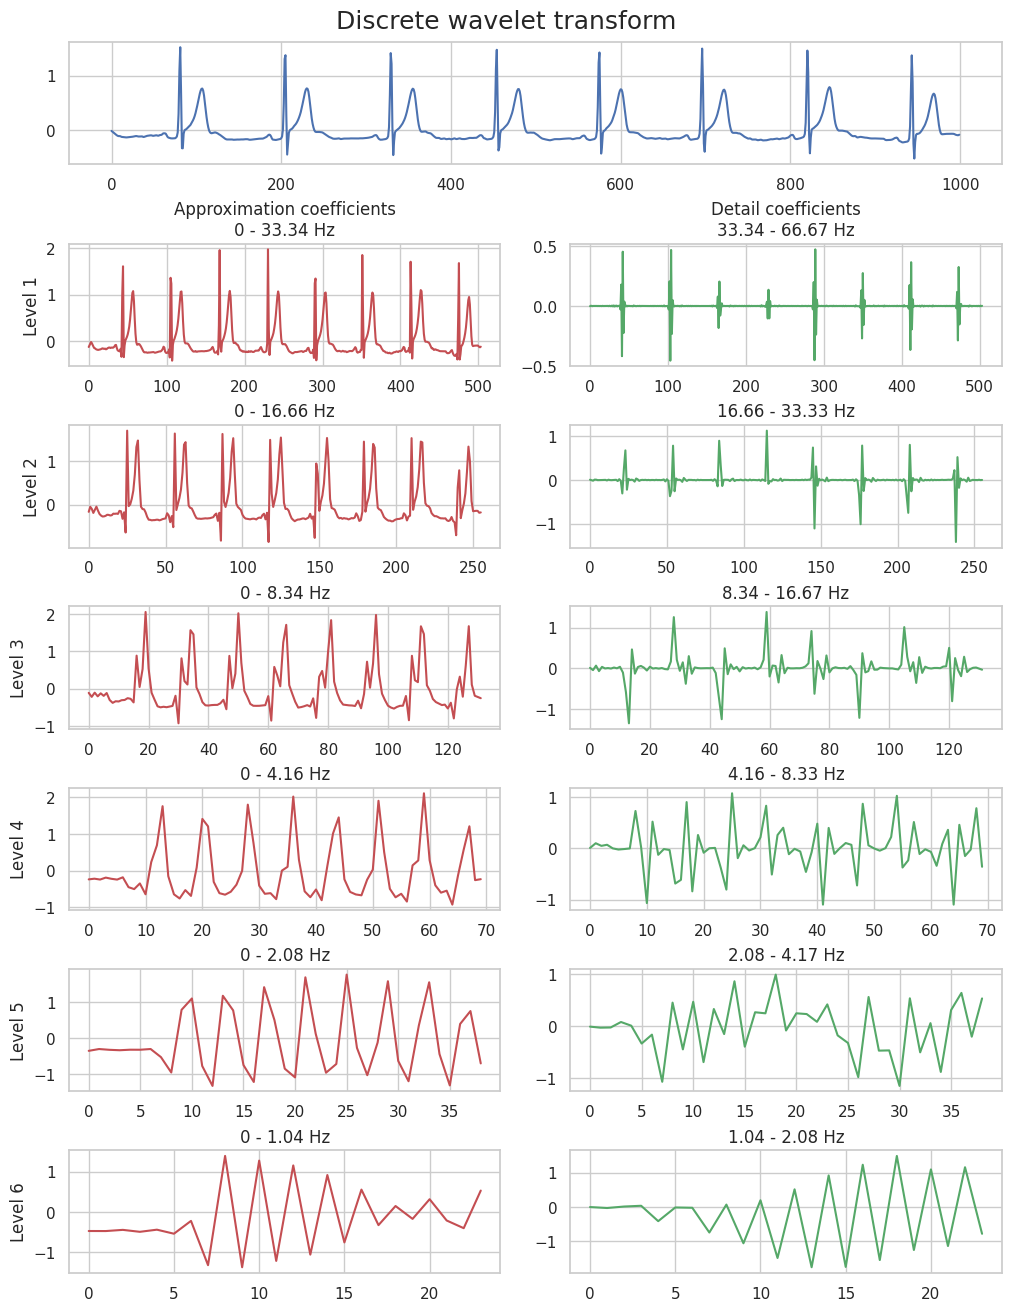

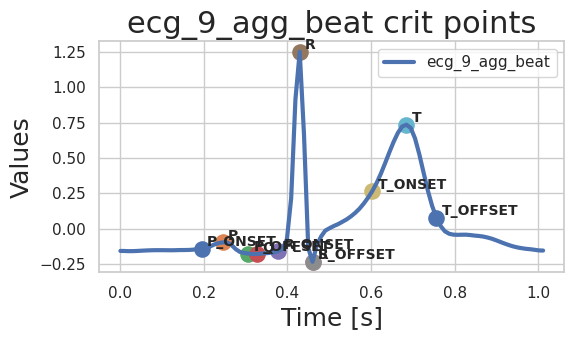

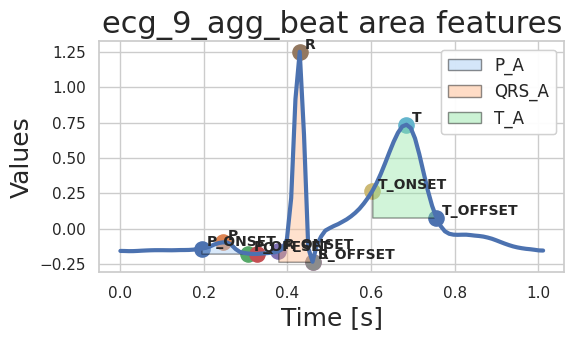

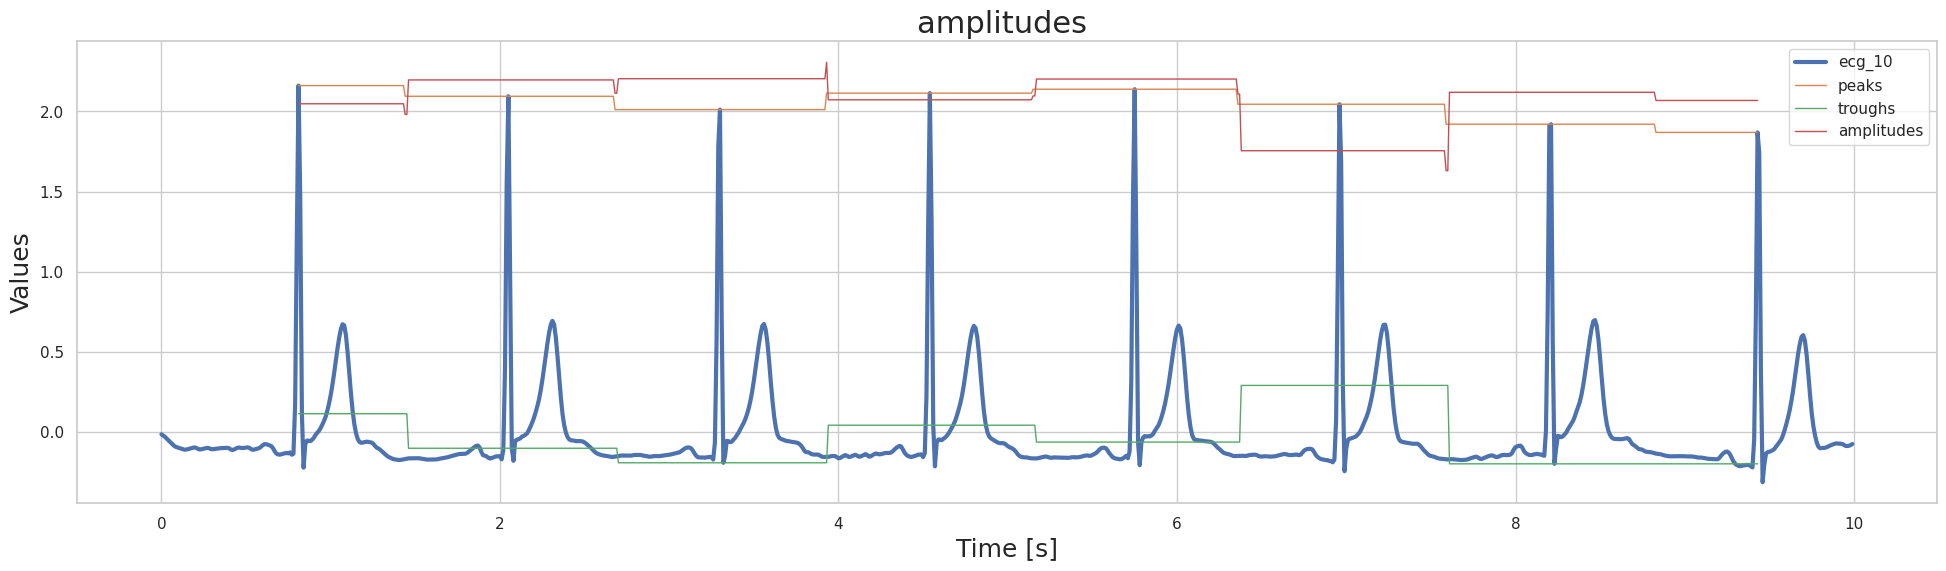

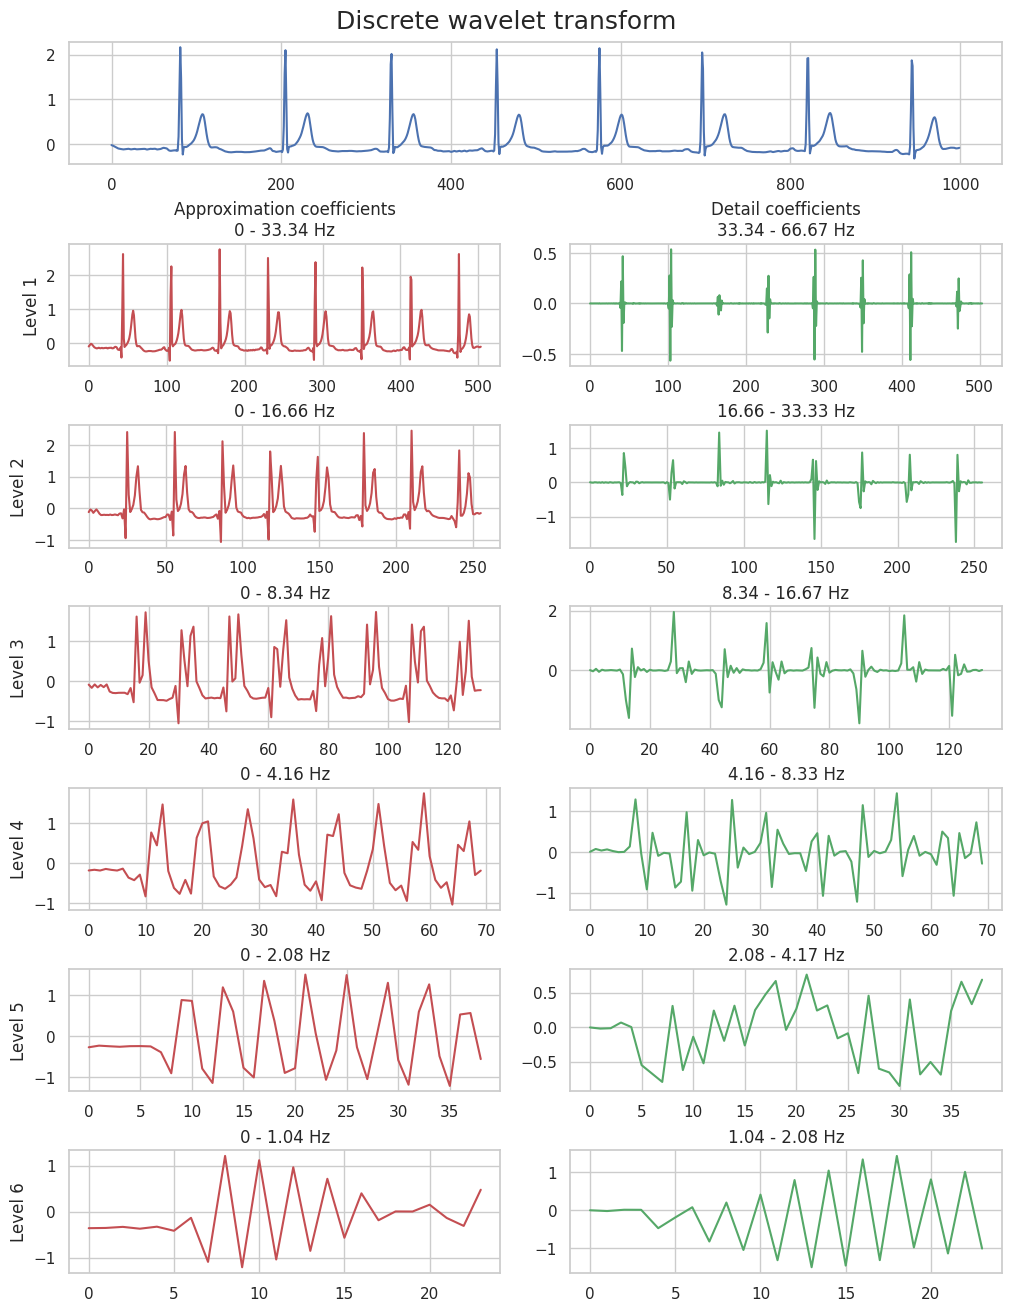

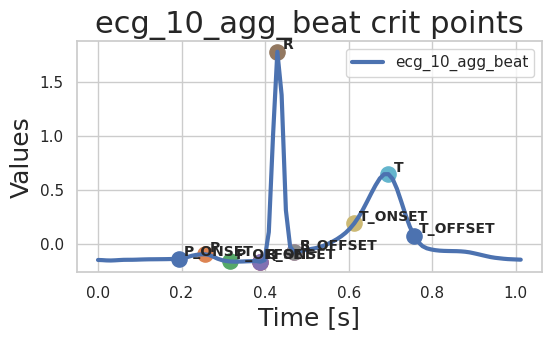

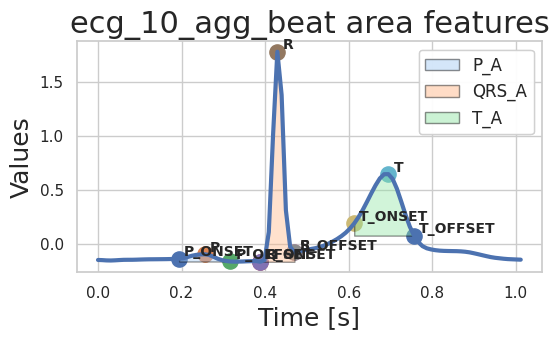

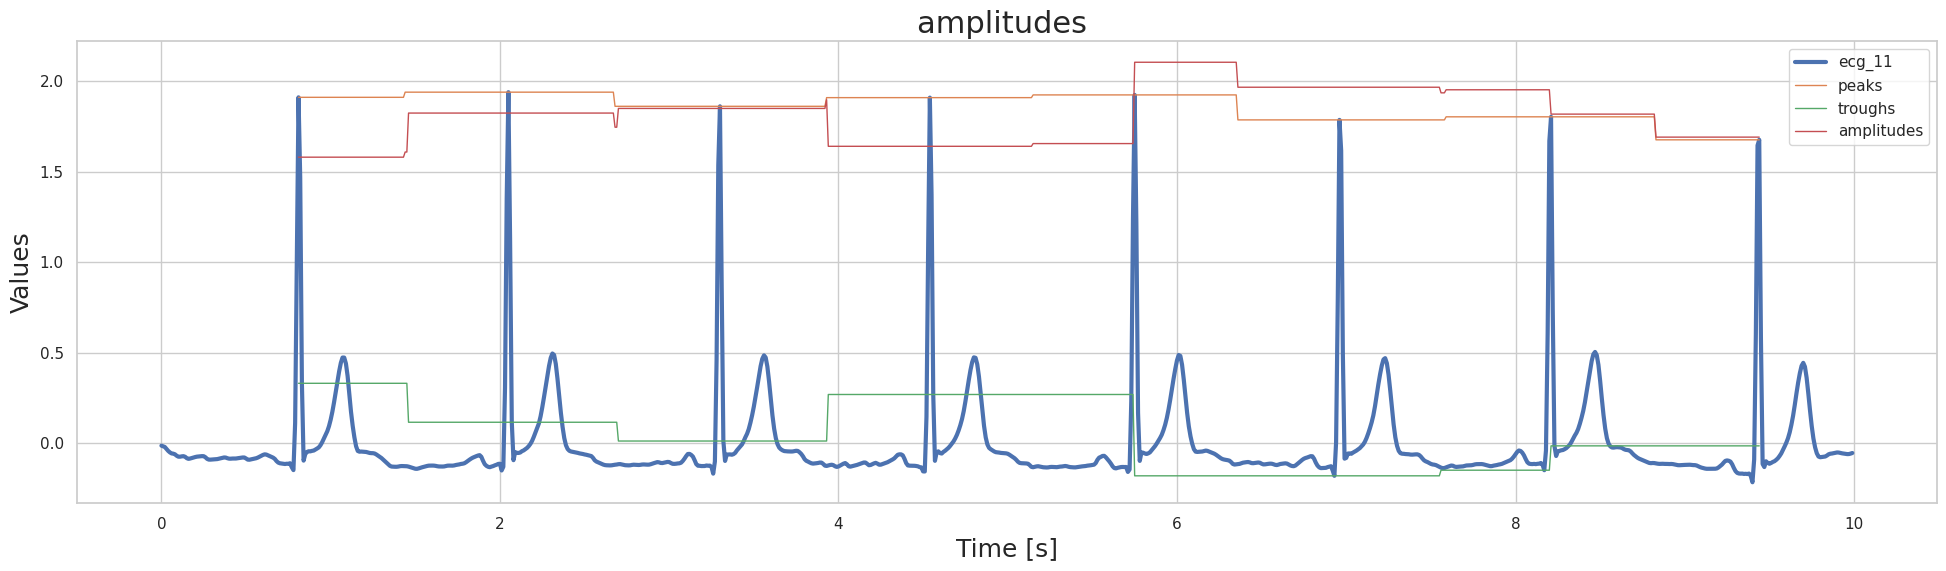

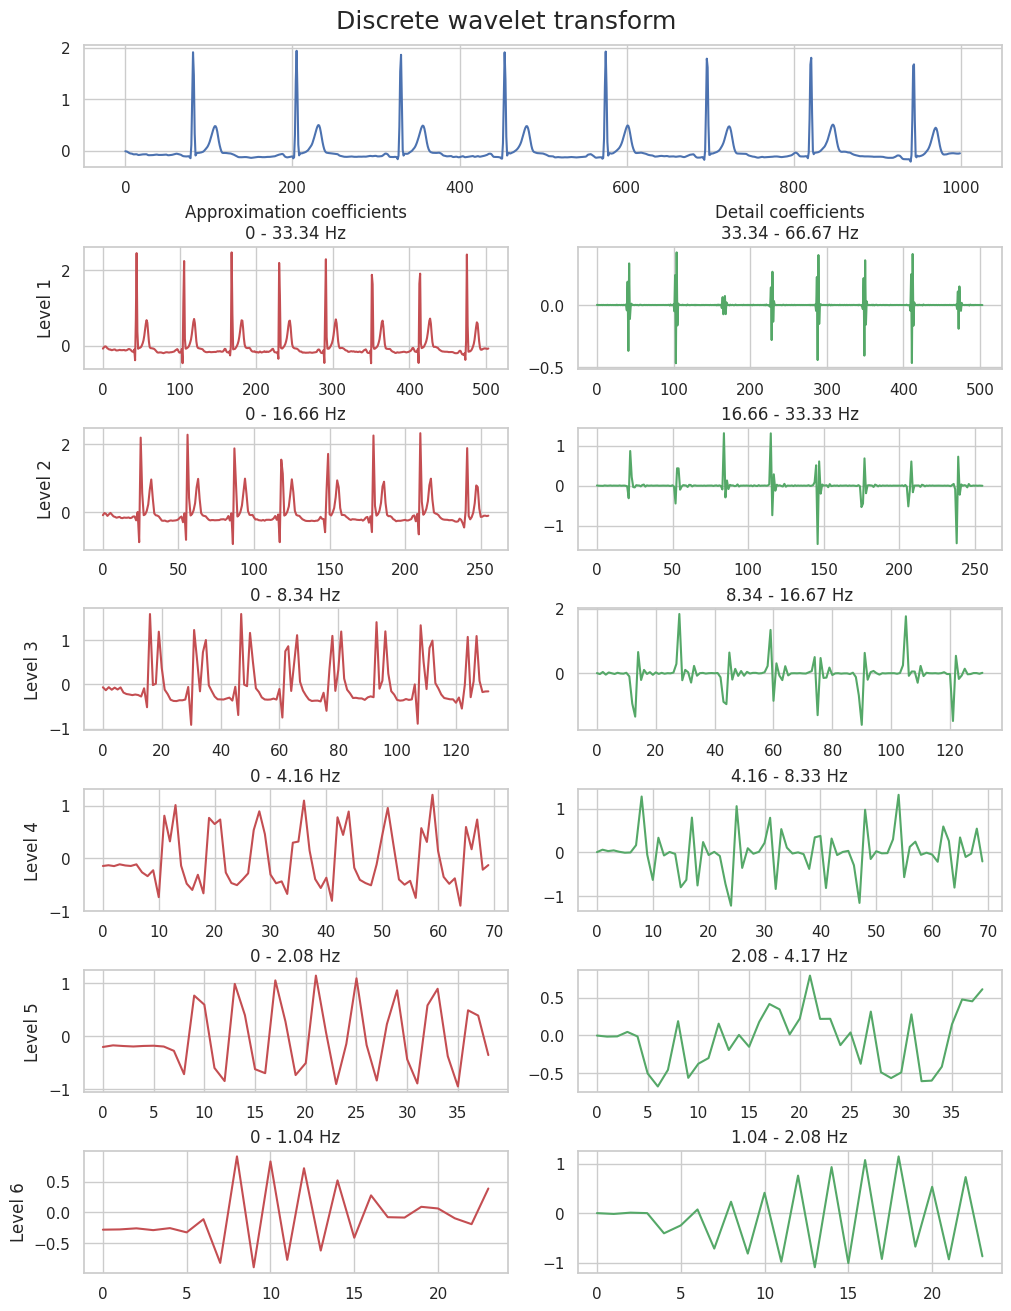

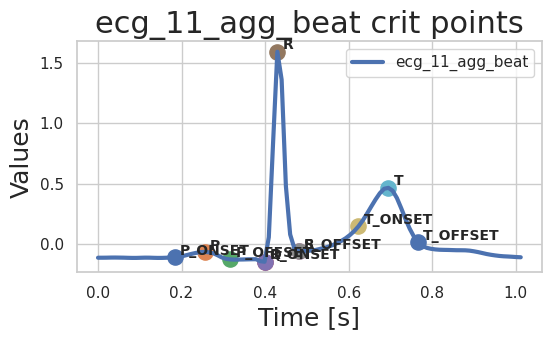

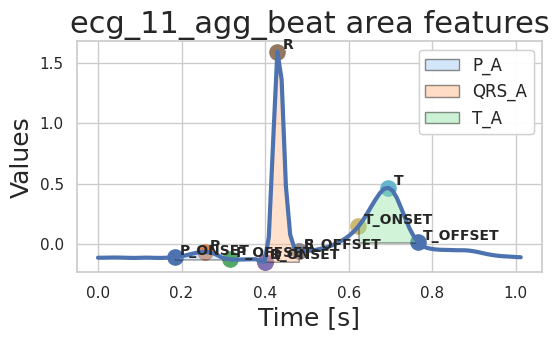

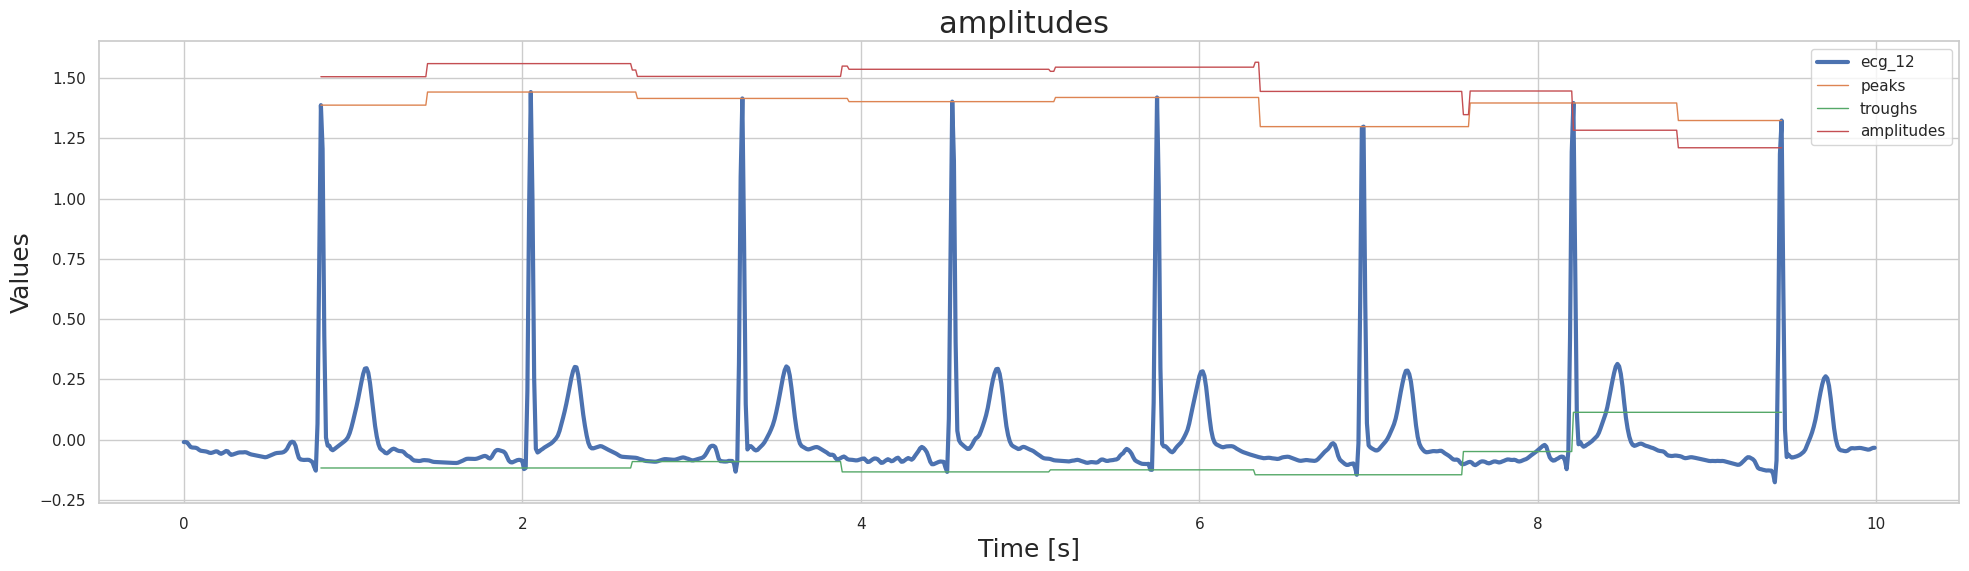

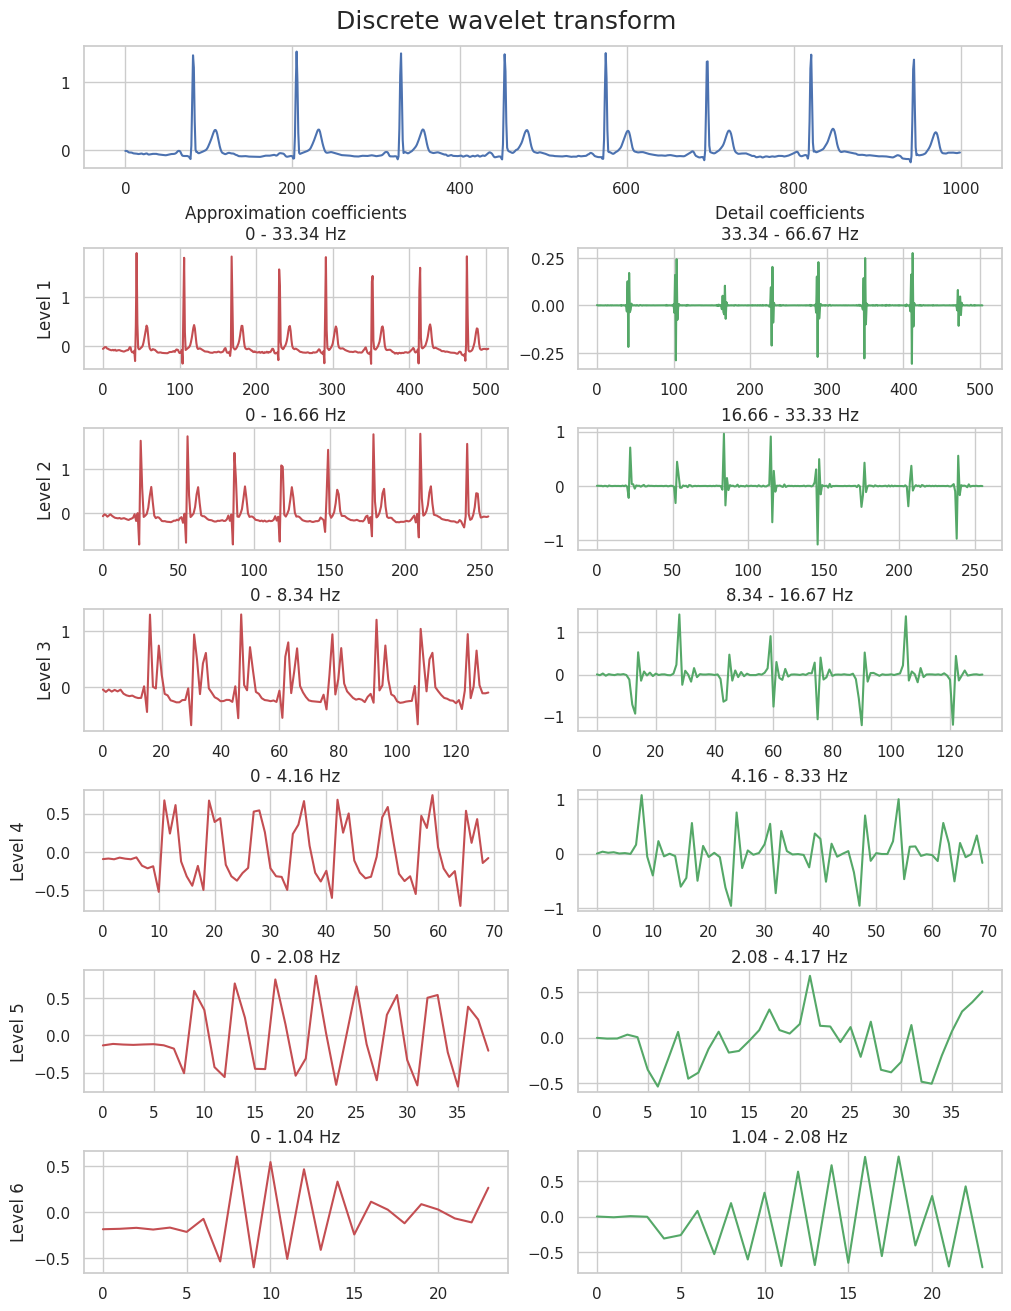

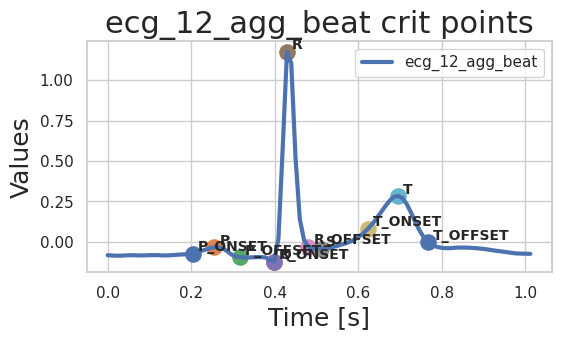

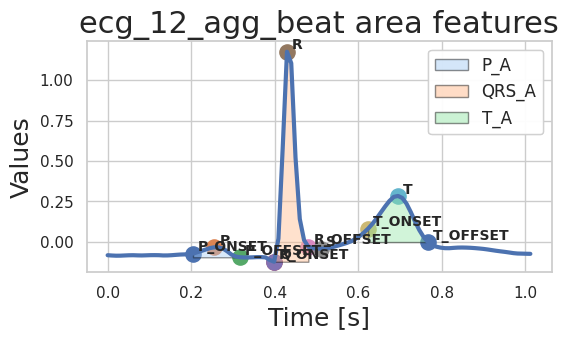

In [26]:
_ = measurement.extract_features(return_arr=False, plot=True)

In [27]:
_

{'ecg_1__basic__entropy': 5.1742997101322175,
 'ecg_1__basic__zero_num_crosses': 64,
 'ecg_1__basic__zero_pos_cross_std': 29.552577530727795,
 'ecg_1__basic__zero_neg_cross_std': 26.011843936445285,
 'ecg_1__basic__mean_num_crosses': 56,
 'ecg_1__basic__mean_pos_cross_std': 35.29033022525303,
 'ecg_1__basic__mean_neg_cross_std': 28.349426560030786,
 'ecg_1__basic__percentile_5': -0.093,
 'ecg_1__basic__percentile_25': -0.06,
 'ecg_1__basic__percentile_75': -0.007,
 'ecg_1__basic__percentile_95': 0.23604999999999995,
 'ecg_1__basic__median': -0.036,
 'ecg_1__basic__mean': 0.0032979999999999993,
 'ecg_1__basic__std': 0.17338548727041717,
 'ecg_1__basic__var': 0.030062527195999996,
 'ecg_1__basic__root_mean_square': 0.080994,
 'ecg_1__basic__kurtosis': 35.35397363581296,
 'ecg_1__basic__skew': 5.417417453787656,
 'ecg_1__basic__energy': 30.073404000000018,
 'ecg_1__peaks_troughs__peaks__entropy': 2.0454323757931085,
 'ecg_1__peaks_troughs__peaks__zero_num_crosses': 0,
 'ecg_1__peaks_troug